IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

# TD-TME08: algorithmes d'apprentissage non-supervisé

L'objectif de ce TP est d'implémenter des algorithmes d'apprentissage non-supervisé, en particulier, l'algorithme de clutering hiérarchique ascendant.

<font color="RED" size="+1">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

Ilyes DJERFAF \
Anyes TAFOUGHALT

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>tme-08</tt> et rajouter à la suite de <tt>tme-08</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au fichier à poster** : *tme-08-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Echancier pour la soumission de votre compte-rendu:**
- le compte-rendu d'une séance doit être remis obligatoirement <font color="RED">avant la séance suivante</font>.

**Le compte-rendu est soumis sur la page Moodle.**


## Préparation

L'archive récupérée avec ce fichier contient aussi le répertoire <code>data</code> qui contient les bases pour expérimenter vos fonctions.

In [1]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

## Travail à réaliser

Le travail à faire se décompose en 2 phases :
- dans un premier temps, le travail porte sur la base d'apprentissage <code>base-2D.csv</code> qui contient des exemples décrits dans $R^2$. Ainsi, il est plus aisé de visualiser les résultats des fonctions à écrire ;
- dans un second temps, les fonctions écrites dans la phase précédente sont à utiliser avec la base d'apprentissage `base-Paris.csv`.

**Attention**: vos fonctions doivent **dès leur création** pouvoir s'appliquer **quelle que soit la dimension** des exemples traités.

## Phase 1: implémentation des fonctions de base

### Chargement du fichier "base_2D.csv"

Charger le fichier `base_2D.csv` et, par exemple avec la fonction `read_csv` de pandas. Le résultat est stocké sous la forme d'un dataframe.

In [2]:
data_2D = pd.read_csv("data/base-2D.csv")

print("Il y a", len(data_2D), "exemples dans la base.")

Il y a 14 exemples dans la base.


In [3]:
# Le dataframe:
data_2D

,X1,X2
0,0.0,4.0
1,1.0,3.5
2,1.0,1.0
3,2.0,1.0
4,2.0,2.0
5,4.0,4.0
6,4.0,5.0
7,4.0,6.0
8,4.5,1.0
9,4.5,6.0


<font size="+1" color="RED">**[Q]**</font> Afficher la base sous forme graphique.


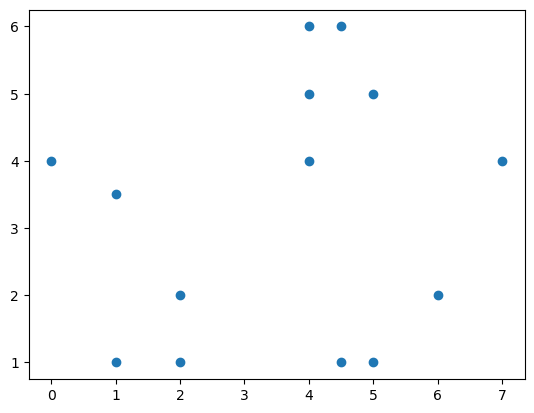

In [4]:
plt.scatter(data_2D["X1"], data_2D["X2"])

## Fonctions préliminaires

### Normalisation des données

<font size="+1" color="RED"><b>[Q]</b></font> Donner les instructions permettant d'afficher les valeurs minimales et maximales de chaque colonne du dataframe `base_2D`.

Remarque : soyez général ! Il faut que ces instructions restent valables quel que soit le dataframe donné (noms et nombre de colonnes non connus au départ par exemple).


In [5]:
print("Minimum et maximum de chaque colonne:")
for colonne in data_2D.columns:
    print("Colonne "+ colonne +" : "+str(min(data_2D[colonne]))+" " +str(max(data_2D[colonne])))

Minimum et maximum de chaque colonne:
Colonne X1 : 0.0 7.0
Colonne X2 : 1.0 6.0


<font size="+1" color="RED"><b>[Q]</b></font> Ecrire la fonction <code>normalisation</code> qui prend en argument un <code>DataFrame</code> et rend le dataframe obtenu en normalisant chaque colonne de ce <code>DataFrame</code> (ie. les valeurs de la matrice résultat doivent être dans l'intervalle $[0,1])$.


In [6]:
def normalisation(dataframe):
    return (dataframe - dataframe.min()) / (dataframe.max() - dataframe.min())

<font size="+1" color="RED"><b>[Q]</b></font> Normaliser les données de la base-2D et afficher leur représentation graphique: vérifier que le tracé est le même que celui obtenu avant la normalisation (aux valeurs des axes près).

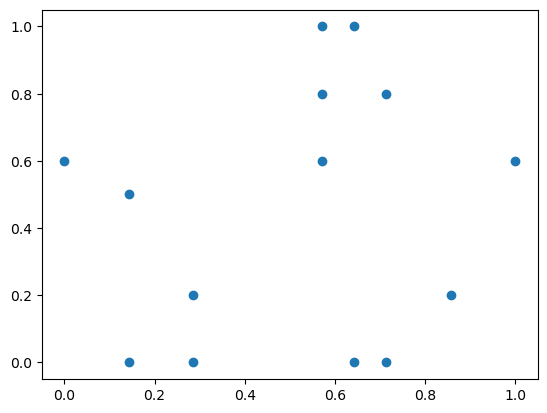

In [7]:
data_2D_norm =normalisation(data_2D)
plt.scatter(data_2D_norm["X1"], data_2D_norm["X2"])

### Distances entre exemples

<font size="+1" color="RED"><b>[Q]</b></font> Ecrire la fonction <code>dist_euclidienne</code> qui prend en argument deux exemples sous la forme de vecteurs (Dataframe ou np.array) et rend leur distance euclidienne. 

In [8]:
import math

def dist_euclidienne(v1, v2):
        return np.linalg.norm(v1 - v2)

In [9]:
v1= data_2D_norm.iloc[0]
v2= data_2D_norm.iloc[1]
print("v1 : ",v1, "\nv2 : ",v2)
print("distance euclidienne entre v1 et v2 : ", dist_euclidienne(v1,v2))

v1 :  X1    0.0
X2    0.6
Name: 0, dtype: float64 
v2 :  X1    0.142857
X2    0.500000
Name: 1, dtype: float64
distance euclidienne entre v1 et v2 :  0.17437936593905287


In [10]:
# Remarque : si elle est bien écrite, la fonction doit fonctionner aussi pour un np.array:

v1= np.array(data_2D_norm.iloc[0])
v2= np.array(data_2D_norm.iloc[1])
print("v1 : ",v1, "\nv2 : ",v2)
print("distance euclidienne entre v1 et v2 : ", dist_euclidienne(v1,v2))

v1 :  [0.  0.6] 
v2 :  [0.14285714 0.5       ]
distance euclidienne entre v1 et v2 :  0.17437936593905287


In [11]:
# autre exemples:
v3= np.array([0,0,0])
v4= np.array([1,1,1])
print("v3 : ",v3, "\nv4 : ",v4)
print("distance euclidienne entre v3 et v4 : ", dist_euclidienne(v3,v4))
v5= np.array([0,0,0])
v6= np.array([-1,0,1])
print("v5 : ",v5, "\nv6 : ",v6)
print("distance euclidienne entre v5 et v6 : ", dist_euclidienne(v5,v6))

v3 :  [0 0 0] 
v4 :  [1 1 1]
distance euclidienne entre v3 et v4 :  1.7320508075688772
v5 :  [0 0 0] 
v6 :  [-1  0  1]
distance euclidienne entre v5 et v6 :  1.4142135623730951


### Calcul de centroides

<font size="+1" color="RED"><b>[Q]</b></font> Ecrire la fonction <code>centroide</code> qui, étant donné un dataframe (ou un np.array) contenant plusieurs exemples rend leur centre de gravité (centroide).
On fait l'hypothèse qu'il y a toujours au moins un exemple.


In [12]:
def centroide(dataframe):
    return np.mean(dataframe,axis=0)

In [13]:
centroide(data_2D_norm)

X1    0.510204
X2    0.450000
dtype: float64

In [14]:
# Remarque : si elle est bien écrite, la fonction doit fonctionner aussi pour un np.array:
centroide( np.array(data_2D_norm) )

array([0.51020408, 0.45      ])

### Distances entre groupes d'exemples


La distance entre deux groupes d'exemples correspond à la distance entre leurs centroïdes (approche "centroid linkage"). Pour cette approche, on prendra seulement la distance euclidienne.

<font size="+1" color="RED"><b>[Q]</b></font> Ecrire la fonction <code>dist_centroides</code> qui prend en argument deux groupes de vecteurs (dataframe ou np.array) et qui rend leur distance euclidienne.


In [15]:
def dist_centroides(X,Y):
    return dist_euclidienne(centroide(X),centroide(Y))

In [16]:
# Par exemple:
dist_centroides(data_2D_norm.iloc[0:4],data_2D_norm.iloc[5:13])

0.5863454787138408

## L'algorithme de classification hiérarchique

Dans la suite de cet exercice, une partition (qui est un groupe de clusters) est représentée par une structure de données de type dictionnaire (<code>dict()</code> en python) :
- la clé est un numéro de cluster (sous la forme d'un entier naturel) ;
- la valeur associée est un liste contenant les indices des exemples qui sont dans le cluster correspondant.

Les indices sont ceux du dataframe qui contient la base initiale.

<b>Dans ce qui suit, on appelle "partition" un tel dictionnaire.</b>


Rappel: `iloc` accepte une liste d'indices pour extraire des lignes d'un dataframe...

In [17]:
data_2D_norm.iloc[[0,3,1]]

,X1,X2
0,0.000000,0.6
3,0.285714,0.0
1,0.142857,0.5


<font size="+1" color="RED"><b>[Q]</b></font> Ecrire la fonction <code>initialise_CHA</code> qui, étant donné un dataframe DF, rend une partition contenant autant d'entrées que d'exemples dans DF. La clé de chaque entrée sera le numéro de l'exemple. Cette fonction sera spécifique au clustering hiérarchique ascendant (CHA).

In [18]:
def initialise_CHA(dataframe):
    return {i:[i] for i in range(len(dataframe))}

In [19]:
# Par exemple:
depart = initialise_CHA(data_2D_norm)
depart

{0: [0],
 1: [1],
 2: [2],
 3: [3],
 4: [4],
 5: [5],
 6: [6],
 7: [7],
 8: [8],
 9: [9],
 10: [10],
 11: [11],
 12: [12],
 13: [13]}

### Variante 1: chaînage par centroides

On souhaite implémenter ici l'algorithme de classification hiérarchique basé sur l'utilisation d'un chaînage par centroides (approche "centroid linkage").

On commence par implémenter une fonction qui, étant donné une partition, permet de regrouper les 2 clusters les plus proches. Ces 2 clusters sont alors fusionnés pour n'en former qu'un seul qui est ajouté à la partition, alors que les 2 clusters initiaux sont retirés de la partition.

On fait l'hypothèse que la partition initiale contient au moins 2 groupes.

<font size="+1" color="RED"><b>[Q]</b></font> Ecrire la fonction <code>fusionne</code> qui prend en argument un dataframe contenant des exemples et une partition P0 et qui rend le tuple composé des 4 valeurs suivantes:
- la partition P1 obtenue après fusion des 2 clusters de P0 les plus proches ;
- les clés des 2 clusters de P0 qui ont été fusionnés et qui ne sont donc plus dans P1 ;
- la distance qui séparait ces 2 clusters, calculée selon le nom de distance donné.

Vous rajouterez un troisième argument (avec valeur par défaut) à la fonction : `verbose=False` qui indique si un message doit être affiché à la fin de la fonction donnant le nom des 2 éléments fusionnés et leur distance.

In [20]:
def fusionne(dataframe, P0, verbose = False):
    distances = {}
    for i in P0:
        j = i+1
        for j in P0:
            if i < j:
                distances[(i,j)] = dist_centroides(dataframe.iloc[P0[i]],dataframe.iloc[P0[j]])
    # on cherche le couple (i,j) qui correspond à la plus petite distance:
    min_dist = min(distances.values())
    for couple in distances:
        if distances[couple] == min_dist:
            cle_1,cle_2 = couple
            break
    # on fusionne les clusters i et j de P0:
    P1 = P0.copy()
    P1[i+1] = P0[cle_1] + P0[cle_2]
    del P1[cle_1]
    del P1[cle_2]
    # on affiche le résultat si verbose = True
    if verbose:
        print(f"Distance mininimale trouvée entre  [{cle_1}, {cle_2}] : {min_dist}")
    return P1, cle_1, cle_2, min_dist
    

In [21]:
# Exemple:
fusionne(data_2D_norm, depart)

({0: [0],
  1: [1],
  2: [2],
  3: [3],
  4: [4],
  5: [5],
  6: [6],
  7: [7],
  9: [9],
  11: [11],
  12: [12],
  13: [13],
  14: [8, 10]},
 8,
 10,
 0.0714285714285714)

In [22]:
# Exemple avec verbose:
fusionne(data_2D_norm, depart,verbose=True)

Distance mininimale trouvée entre  [8, 10] : 0.0714285714285714


({0: [0],
  1: [1],
  2: [2],
  3: [3],
  4: [4],
  5: [5],
  6: [6],
  7: [7],
  9: [9],
  11: [11],
  12: [12],
  13: [13],
  14: [8, 10]},
 8,
 10,
 0.0714285714285714)

<font size="+1" color="RED"><b>[Q]</b></font> Ecrire la fonction <code>CHA_centroid</code> qui prend en argument un dataframe et rend une liste composée de listes contenant chacune:
- les 2 indices d'éléments fusionnés
- la distance les séparant
- la somme du nombre d'éléments des 2 éléments fusionnés

Remarque: chaque sous-liste contient donc les 3 dernières valeurs du résultats de `fusionne()`.


In [23]:
def CHA_centroid(data):
    l = []
    P = initialise_CHA(data)
    while (len(P) != 1):
        result = fusionne(data, P)
        l.append([result[1], result[2], result[3],
                 len(P[result[2]]) + len(P[result[1]])])
        P = result[0]
    return l

In [24]:
# L'application sur nos données:
CHA_centroid(data_2D_norm)

[[8, 10, 0.0714285714285714, 2],
 [7, 9, 0.07142857142857151, 2],
 [2, 3, 0.14285714285714285, 2],
 [6, 11, 0.1428571428571429, 2],
 [0, 1, 0.17437936593905287, 2],
 [15, 17, 0.20316375219039837, 4],
 [4, 16, 0.21237241067597867, 3],
 [12, 14, 0.26811891970176366, 3],
 [5, 19, 0.3047456282855976, 5],
 [13, 22, 0.4542857142857144, 6],
 [20, 21, 0.5000000000000001, 6],
 [18, 24, 0.638139657302555, 8],
 [23, 25, 0.6796842379114776, 14]]

### Construction de dendrogramme

Le dendrogramme permet de visualiser les fusions de clusters réalisés tout au long du déroulement de l'algorithme de clustering hiérarchique.

Pour cette représentation graphique, on utilise une fonction de la librairie `scipy`.

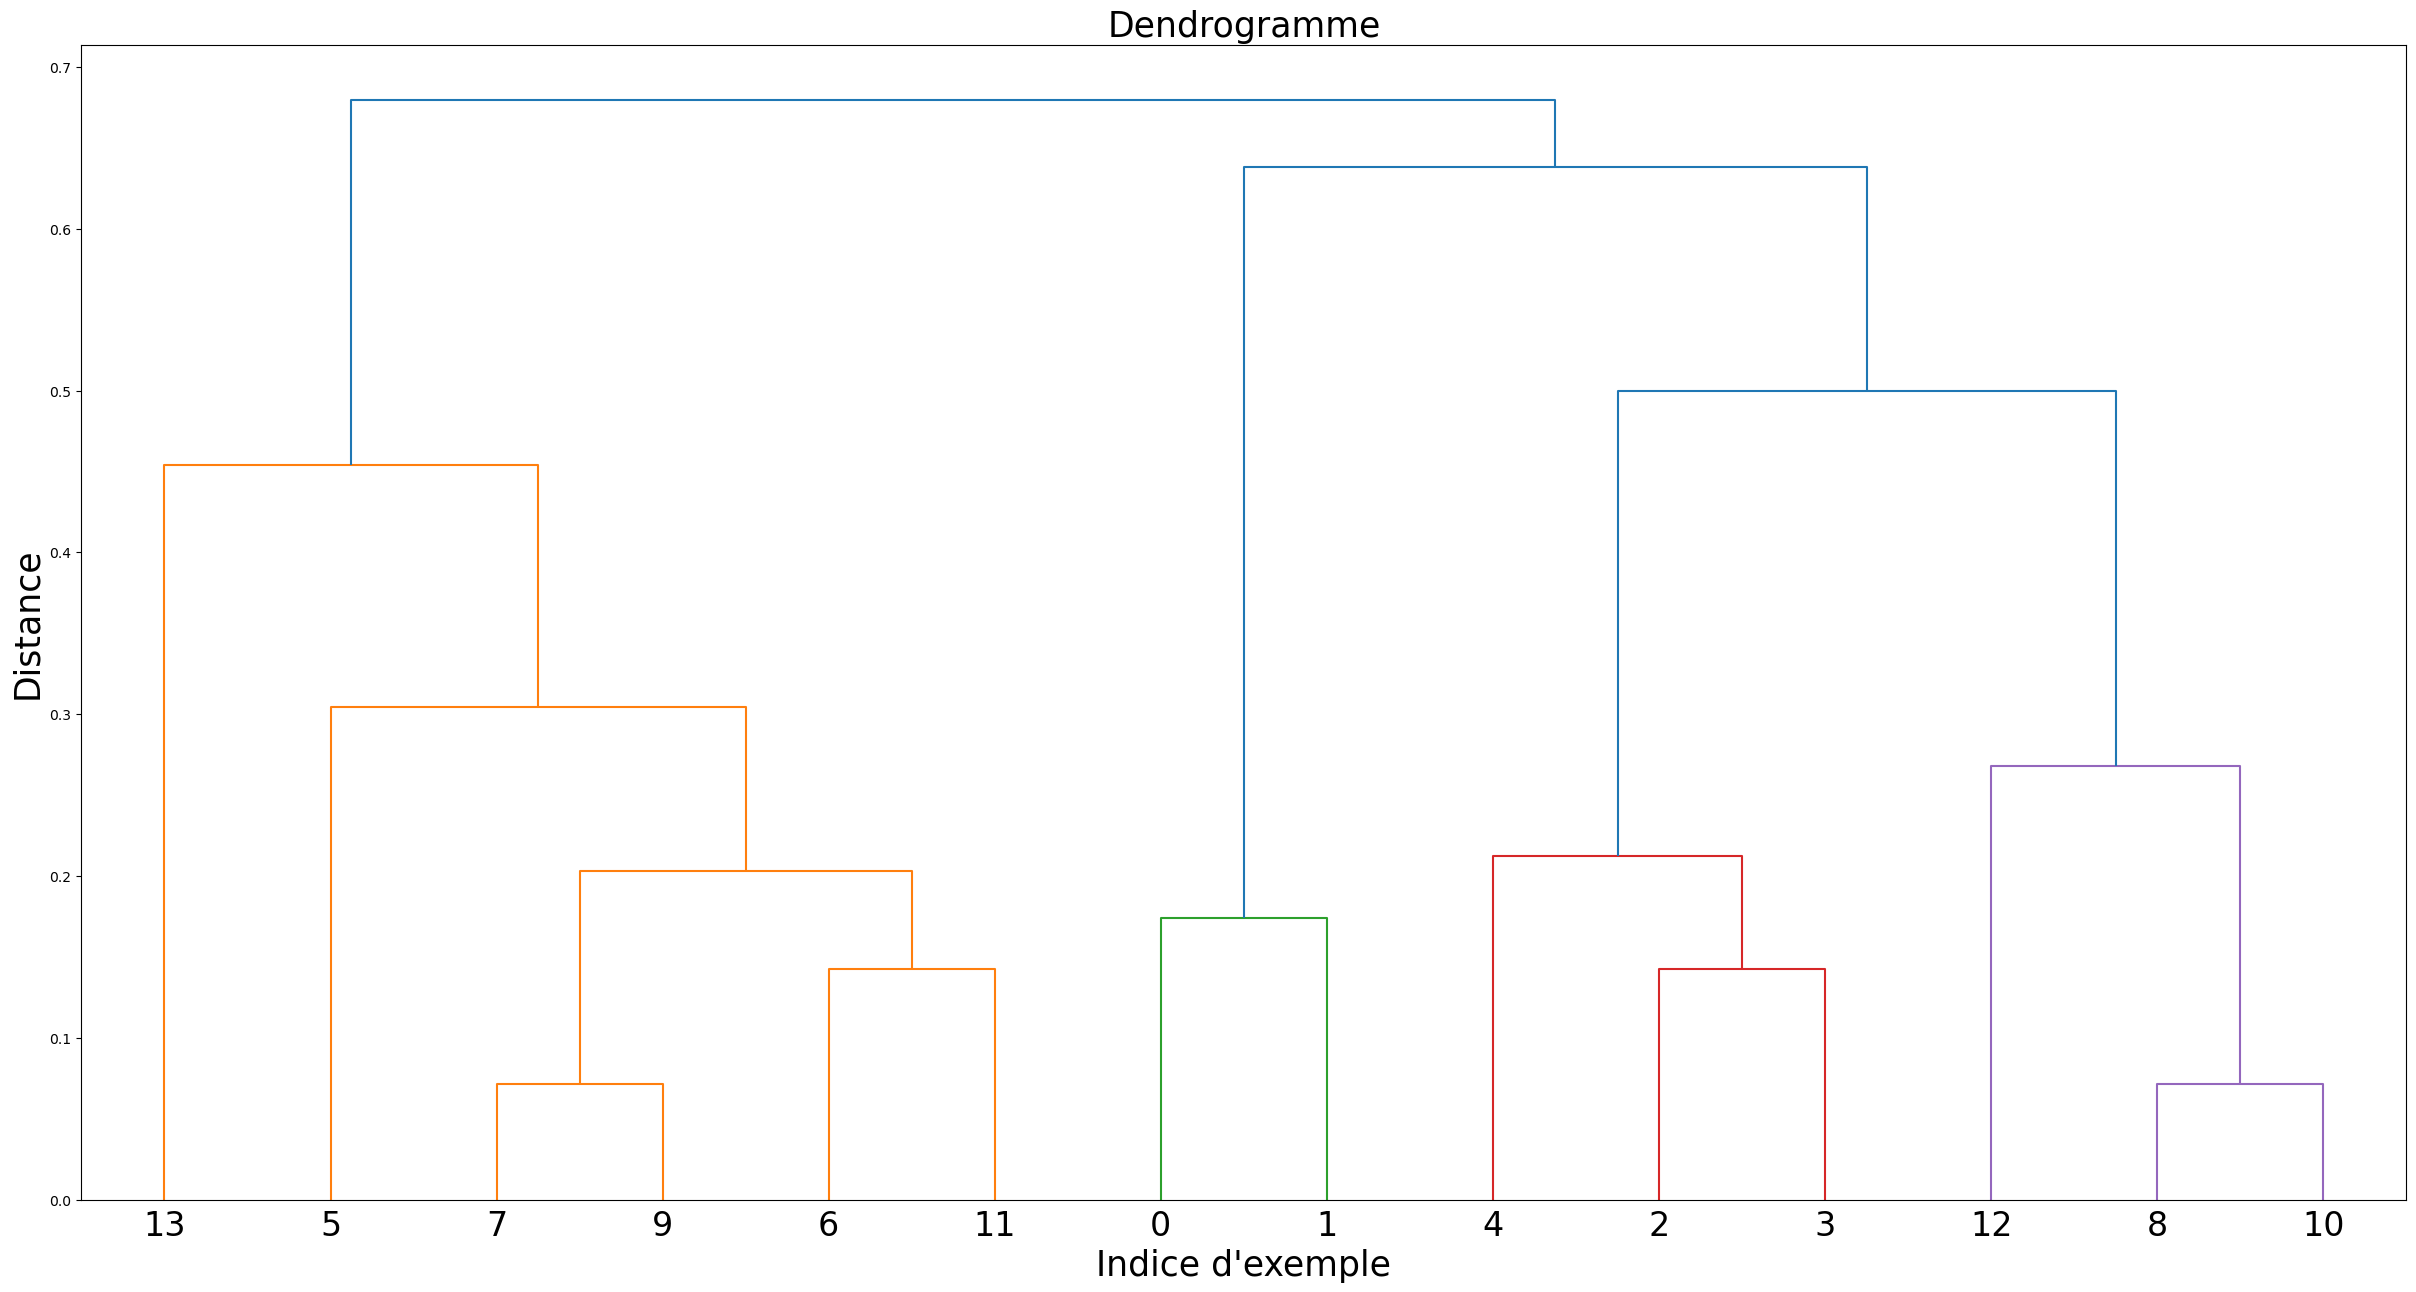

In [25]:
import scipy.cluster.hierarchy

# Paramètre de la fenêtre d'affichage: 
plt.figure(figsize=(30, 15)) # taille : largeur x hauteur
plt.title('Dendrogramme', fontsize=25)    
plt.xlabel("Indice d'exemple", fontsize=25)
plt.ylabel('Distance', fontsize=25)

# Construction du dendrogramme pour notre clustering :
scipy.cluster.hierarchy.dendrogram(
    CHA_centroid(data_2D_norm), 
    leaf_font_size=24.,  # taille des caractères de l'axe des X
)

# Affichage du résultat obtenu:
plt.show()

<font size="+1" color="RED"><b>[Q]</b></font>Modifier la fonction <code>CHA_centroid</code> en lui rajoutant deux arguments supplémentaires avec valeurs par défaut:
- `verbose=False` qui indique si un message doit être affiché lors de la fusion des clusters en donnant le nom des 2 éléments fusionnés et leur distance.
- `dendrogramme=False` pour indiquer si on souhaite ou pas l'affichage du dendrogramme résultat. Si c'est le cas, le dendrogramme sera donc afficher à l'issue de la fonction.

In [26]:
import scipy.cluster.hierarchy

def CHA_centroid(data, verbose=False, dendrogramme=False):
    l = []
    P = initialise_CHA(data)
    while (len(P) != 1):
        result = fusionne(data, P, verbose)
        l.append([result[1], result[2], result[3],
                 len(P[result[2]]) + len(P[result[1]])])
        P = result[0]

    if dendrogramme:
        # Paramètre de la fenêtre d'affichage:
        plt.figure(figsize=(30, 15))  # taille : largeur x hauteur
        plt.title('Dendrogramme', fontsize=25)
        plt.xlabel("Indice d'exemple", fontsize=25)
        plt.ylabel('Distance', fontsize=25)
        # Construction du dendrogramme pour notre clustering :
        scipy.cluster.hierarchy.dendrogram(l, leaf_font_size=24.,)

        # Affichage du résultat obtenu:
        plt.show()
    return l


In [27]:
CHA_centroid(data_2D_norm)

[[8, 10, 0.0714285714285714, 2],
 [7, 9, 0.07142857142857151, 2],
 [2, 3, 0.14285714285714285, 2],
 [6, 11, 0.1428571428571429, 2],
 [0, 1, 0.17437936593905287, 2],
 [15, 17, 0.20316375219039837, 4],
 [4, 16, 0.21237241067597867, 3],
 [12, 14, 0.26811891970176366, 3],
 [5, 19, 0.3047456282855976, 5],
 [13, 22, 0.4542857142857144, 6],
 [20, 21, 0.5000000000000001, 6],
 [18, 24, 0.638139657302555, 8],
 [23, 25, 0.6796842379114776, 14]]

Distance mininimale trouvée entre  [8, 10] : 0.0714285714285714
Distance mininimale trouvée entre  [7, 9] : 0.07142857142857151
Distance mininimale trouvée entre  [2, 3] : 0.14285714285714285
Distance mininimale trouvée entre  [6, 11] : 0.1428571428571429
Distance mininimale trouvée entre  [0, 1] : 0.17437936593905287
Distance mininimale trouvée entre  [15, 17] : 0.20316375219039837
Distance mininimale trouvée entre  [4, 16] : 0.21237241067597867
Distance mininimale trouvée entre  [12, 14] : 0.26811891970176366
Distance mininimale trouvée entre  [5, 19] : 0.3047456282855976
Distance mininimale trouvée entre  [13, 22] : 0.4542857142857144
Distance mininimale trouvée entre  [20, 21] : 0.5000000000000001
Distance mininimale trouvée entre  [18, 24] : 0.638139657302555
Distance mininimale trouvée entre  [23, 25] : 0.6796842379114776


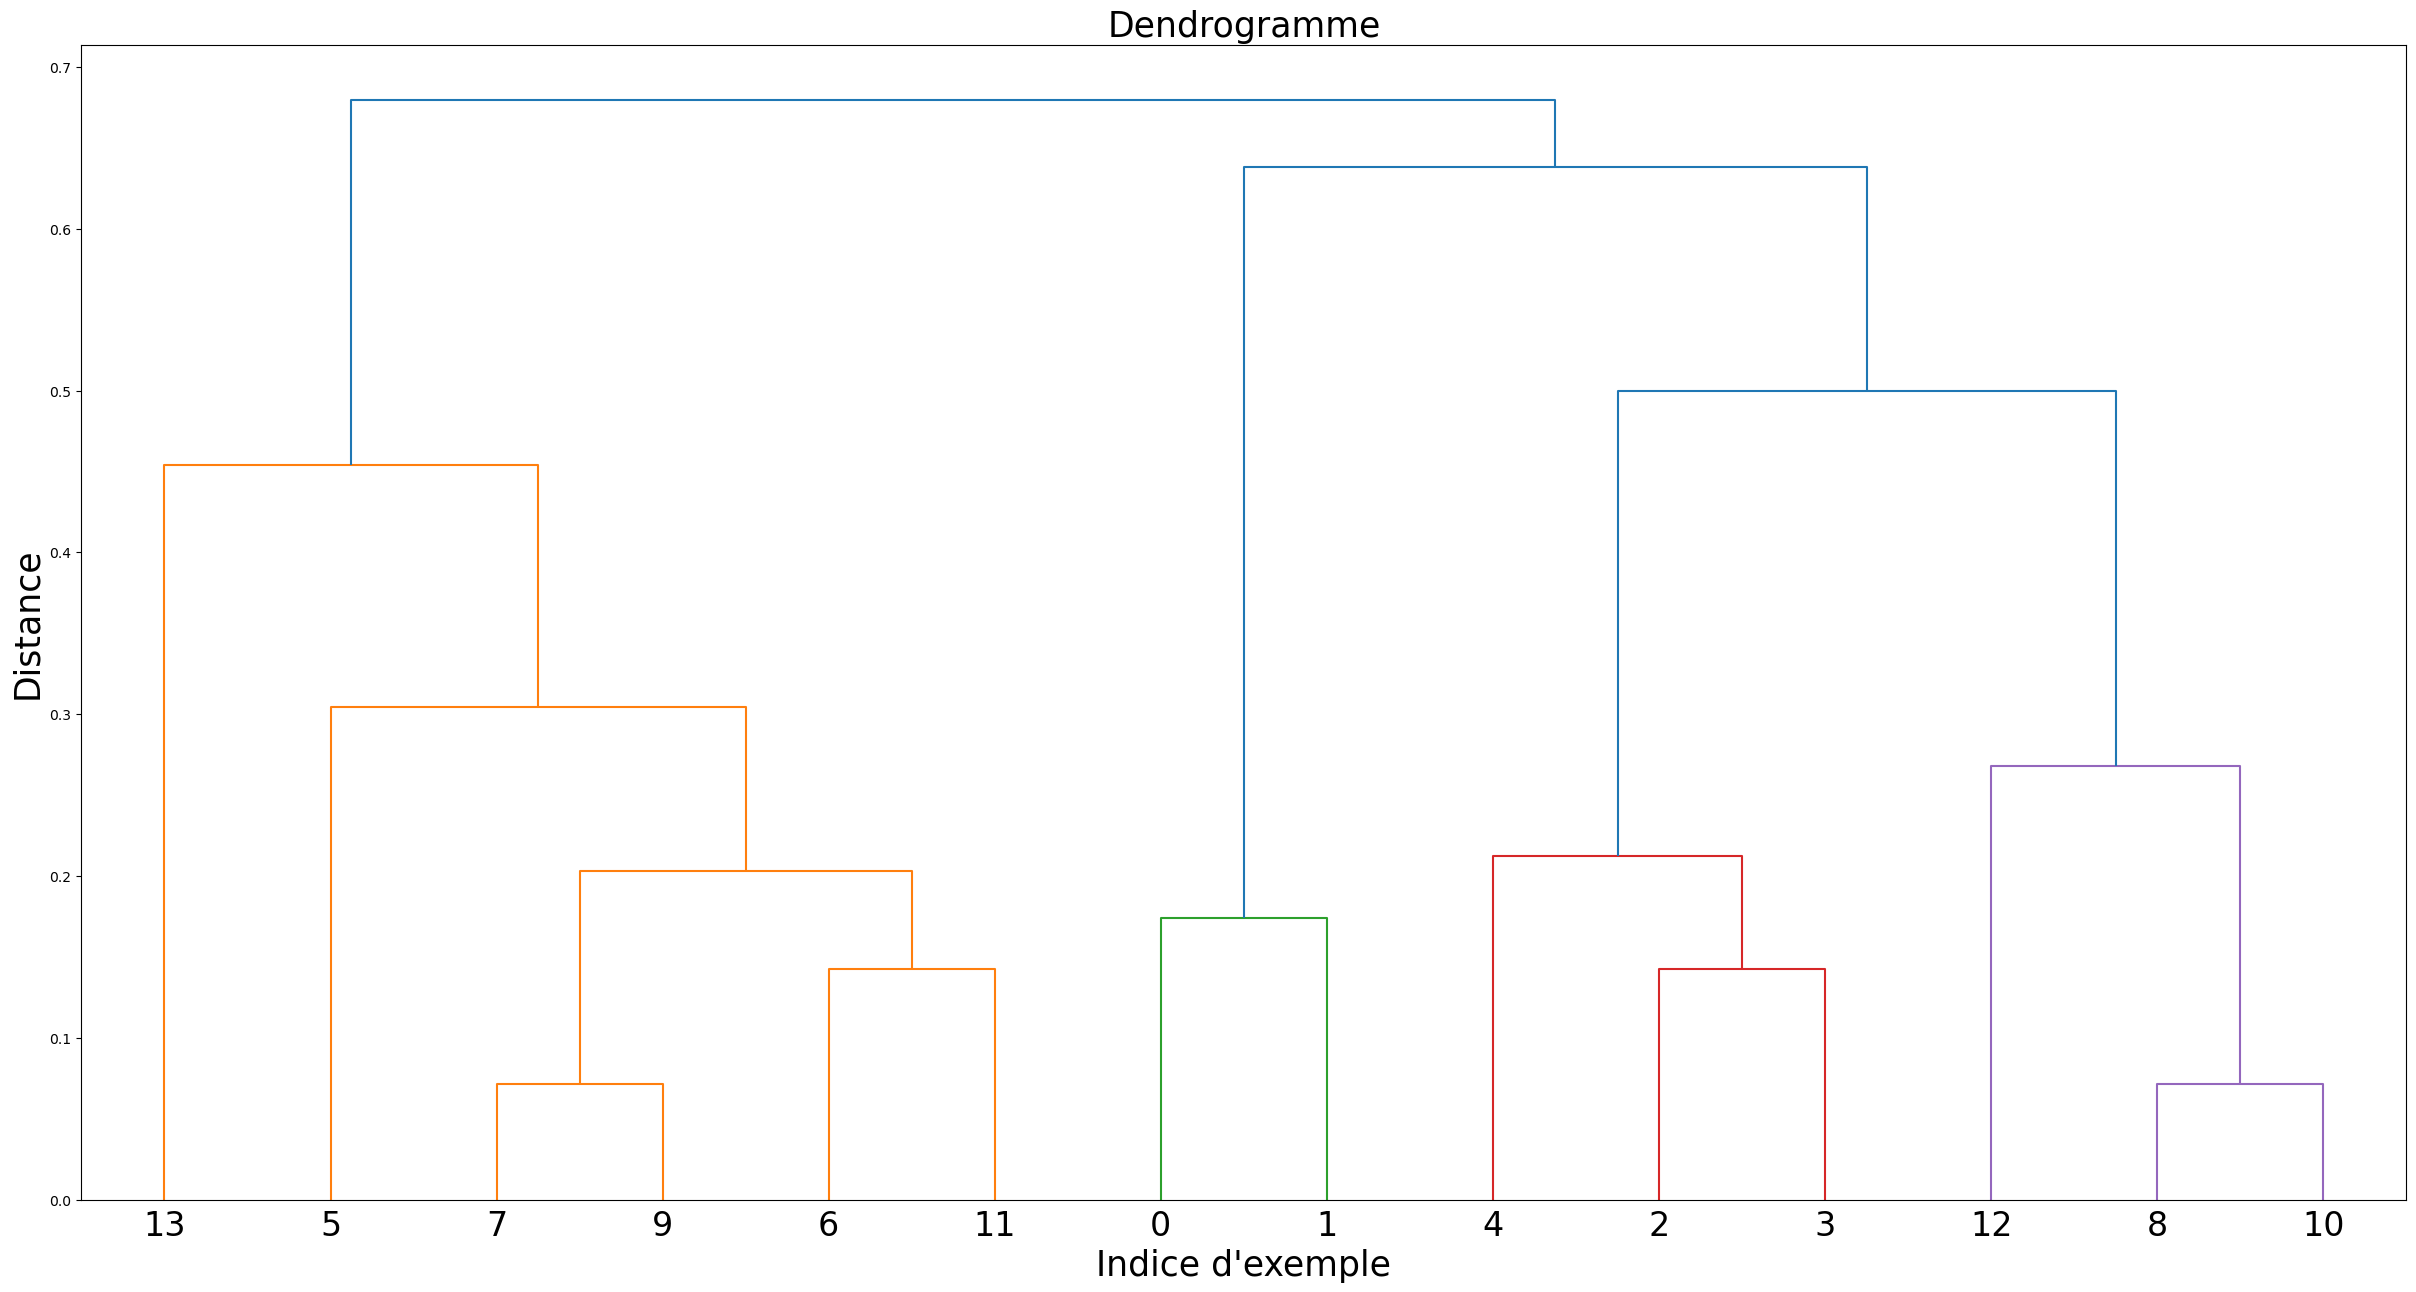

[[8, 10, 0.0714285714285714, 2],
 [7, 9, 0.07142857142857151, 2],
 [2, 3, 0.14285714285714285, 2],
 [6, 11, 0.1428571428571429, 2],
 [0, 1, 0.17437936593905287, 2],
 [15, 17, 0.20316375219039837, 4],
 [4, 16, 0.21237241067597867, 3],
 [12, 14, 0.26811891970176366, 3],
 [5, 19, 0.3047456282855976, 5],
 [13, 22, 0.4542857142857144, 6],
 [20, 21, 0.5000000000000001, 6],
 [18, 24, 0.638139657302555, 8],
 [23, 25, 0.6796842379114776, 14]]

In [28]:
CHA_centroid(data_2D_norm,verbose=True,dendrogramme=True)

## Variantes : complete linkage, simple linkage, average linkage

<font size="+1" color="RED"><b>[Q]</b></font> Ecrire 3 nouvelles fonctions `clustering_hierarchique_complete`, `clustering_hierarchique_simple` et `clustering_hierarchique_average` qui implémentent le clustering hiérarchique basé le linkage correspondant.


Puis afficher et comparer les dendrogrammes obtenus par les 4 approches de clustering implémentées.

In [29]:
from scipy.spatial.distance import cdist

def clustering_hierarchique_complete(X, Y):
    return np.max(cdist(X, Y, 'euclidean'))

def clustering_hierarchique_simple(X, Y):
    return np.min(cdist(X, Y, 'euclidean'))

def clustering_hierarchique_average(X, Y):
    return np.mean(cdist(X, Y, 'euclidean'))


<font size="+1" color="RED"><b>[Q]</b></font> Regrouper les 4 fonctions de clustering hiérarchique ascendant en écrivant une fonction `CHA` qui prend les mêmes arguments que chacune des 4 fonctions précédentes, et un argument suplémentaire `linkage`, qui est une chaîne de caractères parmi `"centroid"` (valeur par défaut),  `"complete"`,`"simple"`, et `"average"` et qui donne le nom de l'approche linkage à utiliser pour construire le clustering.

In [30]:
def fusionnes(dataframe, P0, verbose=False, linkage='complete'):
    distances = {}
    for i in P0:
        j = i+1
        for j in P0:
            if i < j:
                if linkage == 'complete':
                    distances[(i, j)] = clustering_hierarchique_complete(dataframe.iloc[P0[i]], dataframe.iloc[P0[j]])
                elif linkage == 'simple':
                    distances[(i, j)] = clustering_hierarchique_simple(dataframe.iloc[P0[i]], dataframe.iloc[P0[j]])
                elif linkage == 'average':
                    distances[(i, j)] = clustering_hierarchique_average(dataframe.iloc[P0[i]], dataframe.iloc[P0[j]])
                else:
                    print('Mauvais paramètre pour linkage')
                    return None
    # on cherche le couple (i,j) qui correspond à la plus petite distance:
    min_dist = min(distances.values())
    for couple in distances:
        if distances[couple] == min_dist:
            cle_1, cle_2 = couple
            break
    # on fusionne les clusters i et j de P0:
    P1 = P0.copy()
    P1[i+1] = P0[cle_1] + P0[cle_2]
    del P1[cle_1]
    del P1[cle_2]
    # on affiche le résultat si verbose = True
    if verbose:
        print(
            f"Distance mininimale trouvée entre  [{cle_1}, {cle_2}] : {min_dist}")
    return P1, cle_1, cle_2, min_dist


In [31]:
def CHA(DF,linkage='centroid', verbose=False,dendrogramme=False):
    """  ##### donner une documentation à cette fonction
    """
    ############################ A COMPLETER
    if linkage == 'centroid':
        return CHA_centroid(DF, verbose, dendrogramme)
    
    else:
        l = []
        P = initialise_CHA(DF)
        while (len(P) != 1):
            result = fusionnes(DF, P, verbose, linkage)
            l.append([result[1], result[2], result[3], len(P[result[2]]) + len(P[result[1]])])
            P = result[0]

        if dendrogramme:
            # Paramètre de la fenêtre d'affichage:
            plt.figure(figsize=(30, 15))  # taille : largeur x hauteur
            plt.title('Dendrogramme', fontsize=25)
            plt.xlabel("Indice d'exemple", fontsize=25)
            plt.ylabel('Distance', fontsize=25)
            # Construction du dendrogramme pour notre clustering :
            scipy.cluster.hierarchy.dendrogram(l, leaf_font_size=24.,)

            # Affichage du résultat obtenu:
            plt.show()
        return l
    
    raise NotImplementedError("Please Implement this method")


#### Tester nos fonctions

Distance mininimale trouvée entre  [8, 10] : 0.0714285714285714
Distance mininimale trouvée entre  [7, 9] : 0.07142857142857151
Distance mininimale trouvée entre  [2, 3] : 0.14285714285714285
Distance mininimale trouvée entre  [6, 11] : 0.1428571428571429
Distance mininimale trouvée entre  [0, 1] : 0.17437936593905287
Distance mininimale trouvée entre  [15, 17] : 0.2457807219155036
Distance mininimale trouvée entre  [4, 16] : 0.24578072191550362
Distance mininimale trouvée entre  [12, 14] : 0.2931183504097598
Distance mininimale trouvée entre  [5, 19] : 0.40632750438079696
Distance mininimale trouvée entre  [13, 22] : 0.5862367008195198
Distance mininimale trouvée entre  [18, 20] : 0.6645544771207432
Distance mininimale trouvée entre  [21, 24] : 0.945882591842677
Distance mininimale trouvée entre  [23, 25] : 1.118033988749895


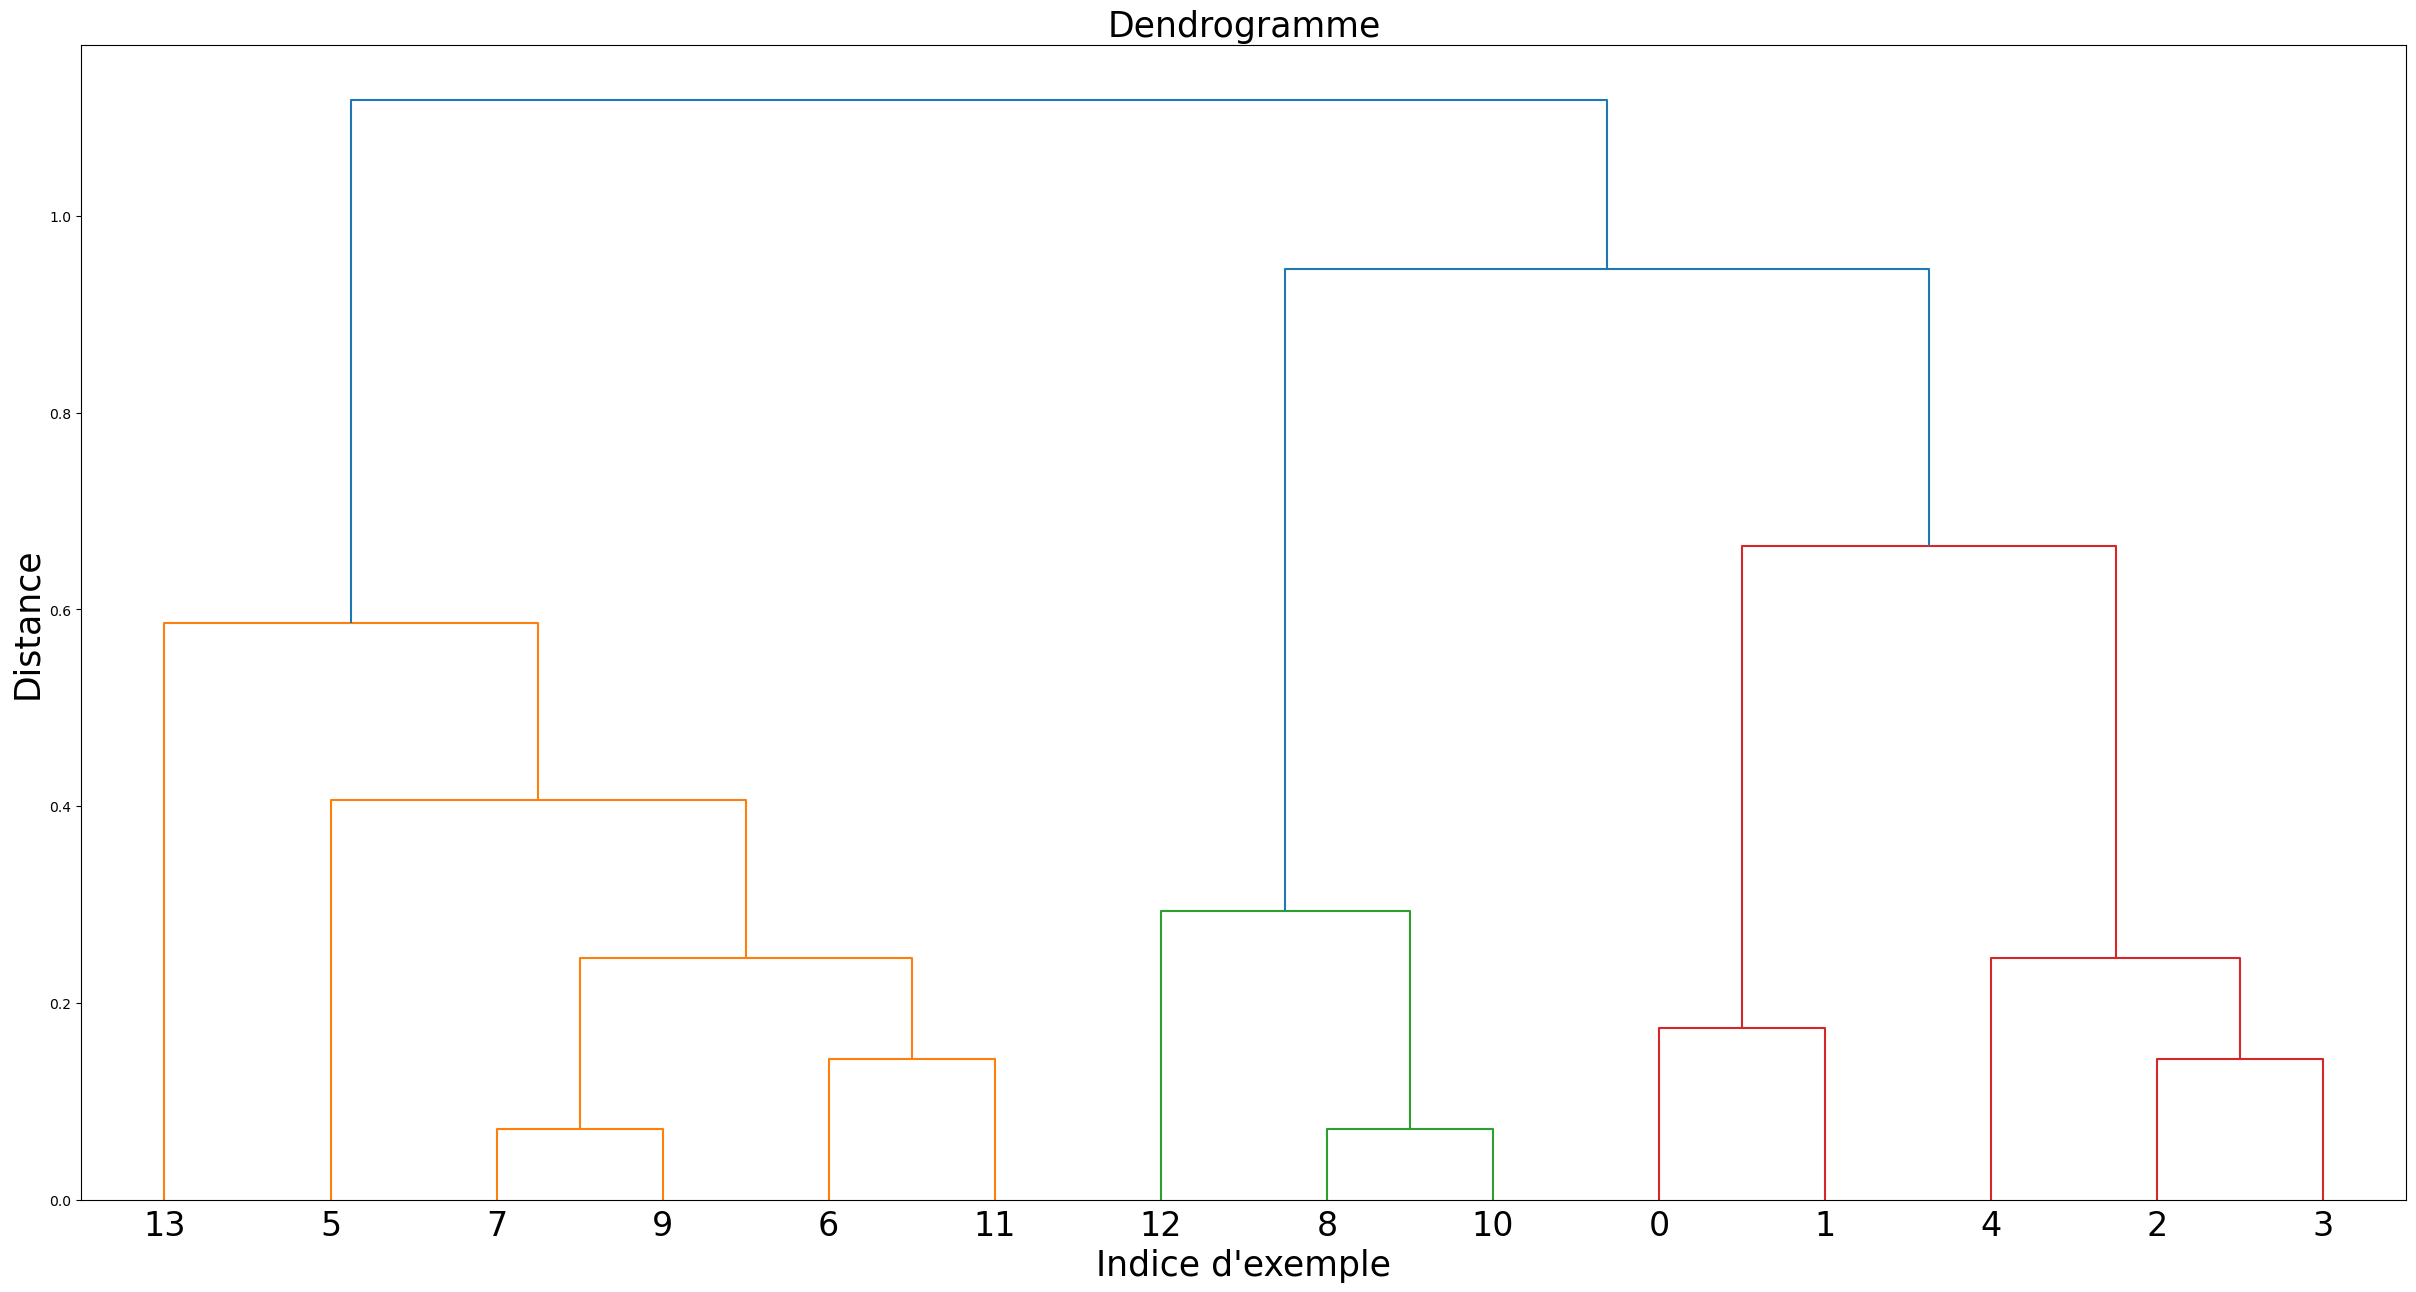

[[8, 10, 0.0714285714285714, 2],
 [7, 9, 0.07142857142857151, 2],
 [2, 3, 0.14285714285714285, 2],
 [6, 11, 0.1428571428571429, 2],
 [0, 1, 0.17437936593905287, 2],
 [15, 17, 0.2457807219155036, 4],
 [4, 16, 0.24578072191550362, 3],
 [12, 14, 0.2931183504097598, 3],
 [5, 19, 0.40632750438079696, 5],
 [13, 22, 0.5862367008195198, 6],
 [18, 20, 0.6645544771207432, 5],
 [21, 24, 0.945882591842677, 8],
 [23, 25, 1.118033988749895, 14]]

In [32]:
CHA(data_2D_norm,linkage='complete',verbose=True,dendrogramme=True)

Distance mininimale trouvée entre  [8, 10] : 0.0714285714285714
Distance mininimale trouvée entre  [7, 9] : 0.07142857142857151
Distance mininimale trouvée entre  [2, 3] : 0.14285714285714285
Distance mininimale trouvée entre  [6, 11] : 0.1428571428571429
Distance mininimale trouvée entre  [0, 1] : 0.17437936593905287
Distance mininimale trouvée entre  [15, 17] : 0.19999999999999996
Distance mininimale trouvée entre  [4, 16] : 0.2
Distance mininimale trouvée entre  [5, 19] : 0.20000000000000007
Distance mininimale trouvée entre  [12, 14] : 0.2457807219155036
Distance mininimale trouvée entre  [18, 20] : 0.3322772385603716
Distance mininimale trouvée entre  [13, 21] : 0.3487587318781058
Distance mininimale trouvée entre  [22, 23] : 0.3571428571428572
Distance mininimale trouvée entre  [24, 25] : 0.4247448213519573


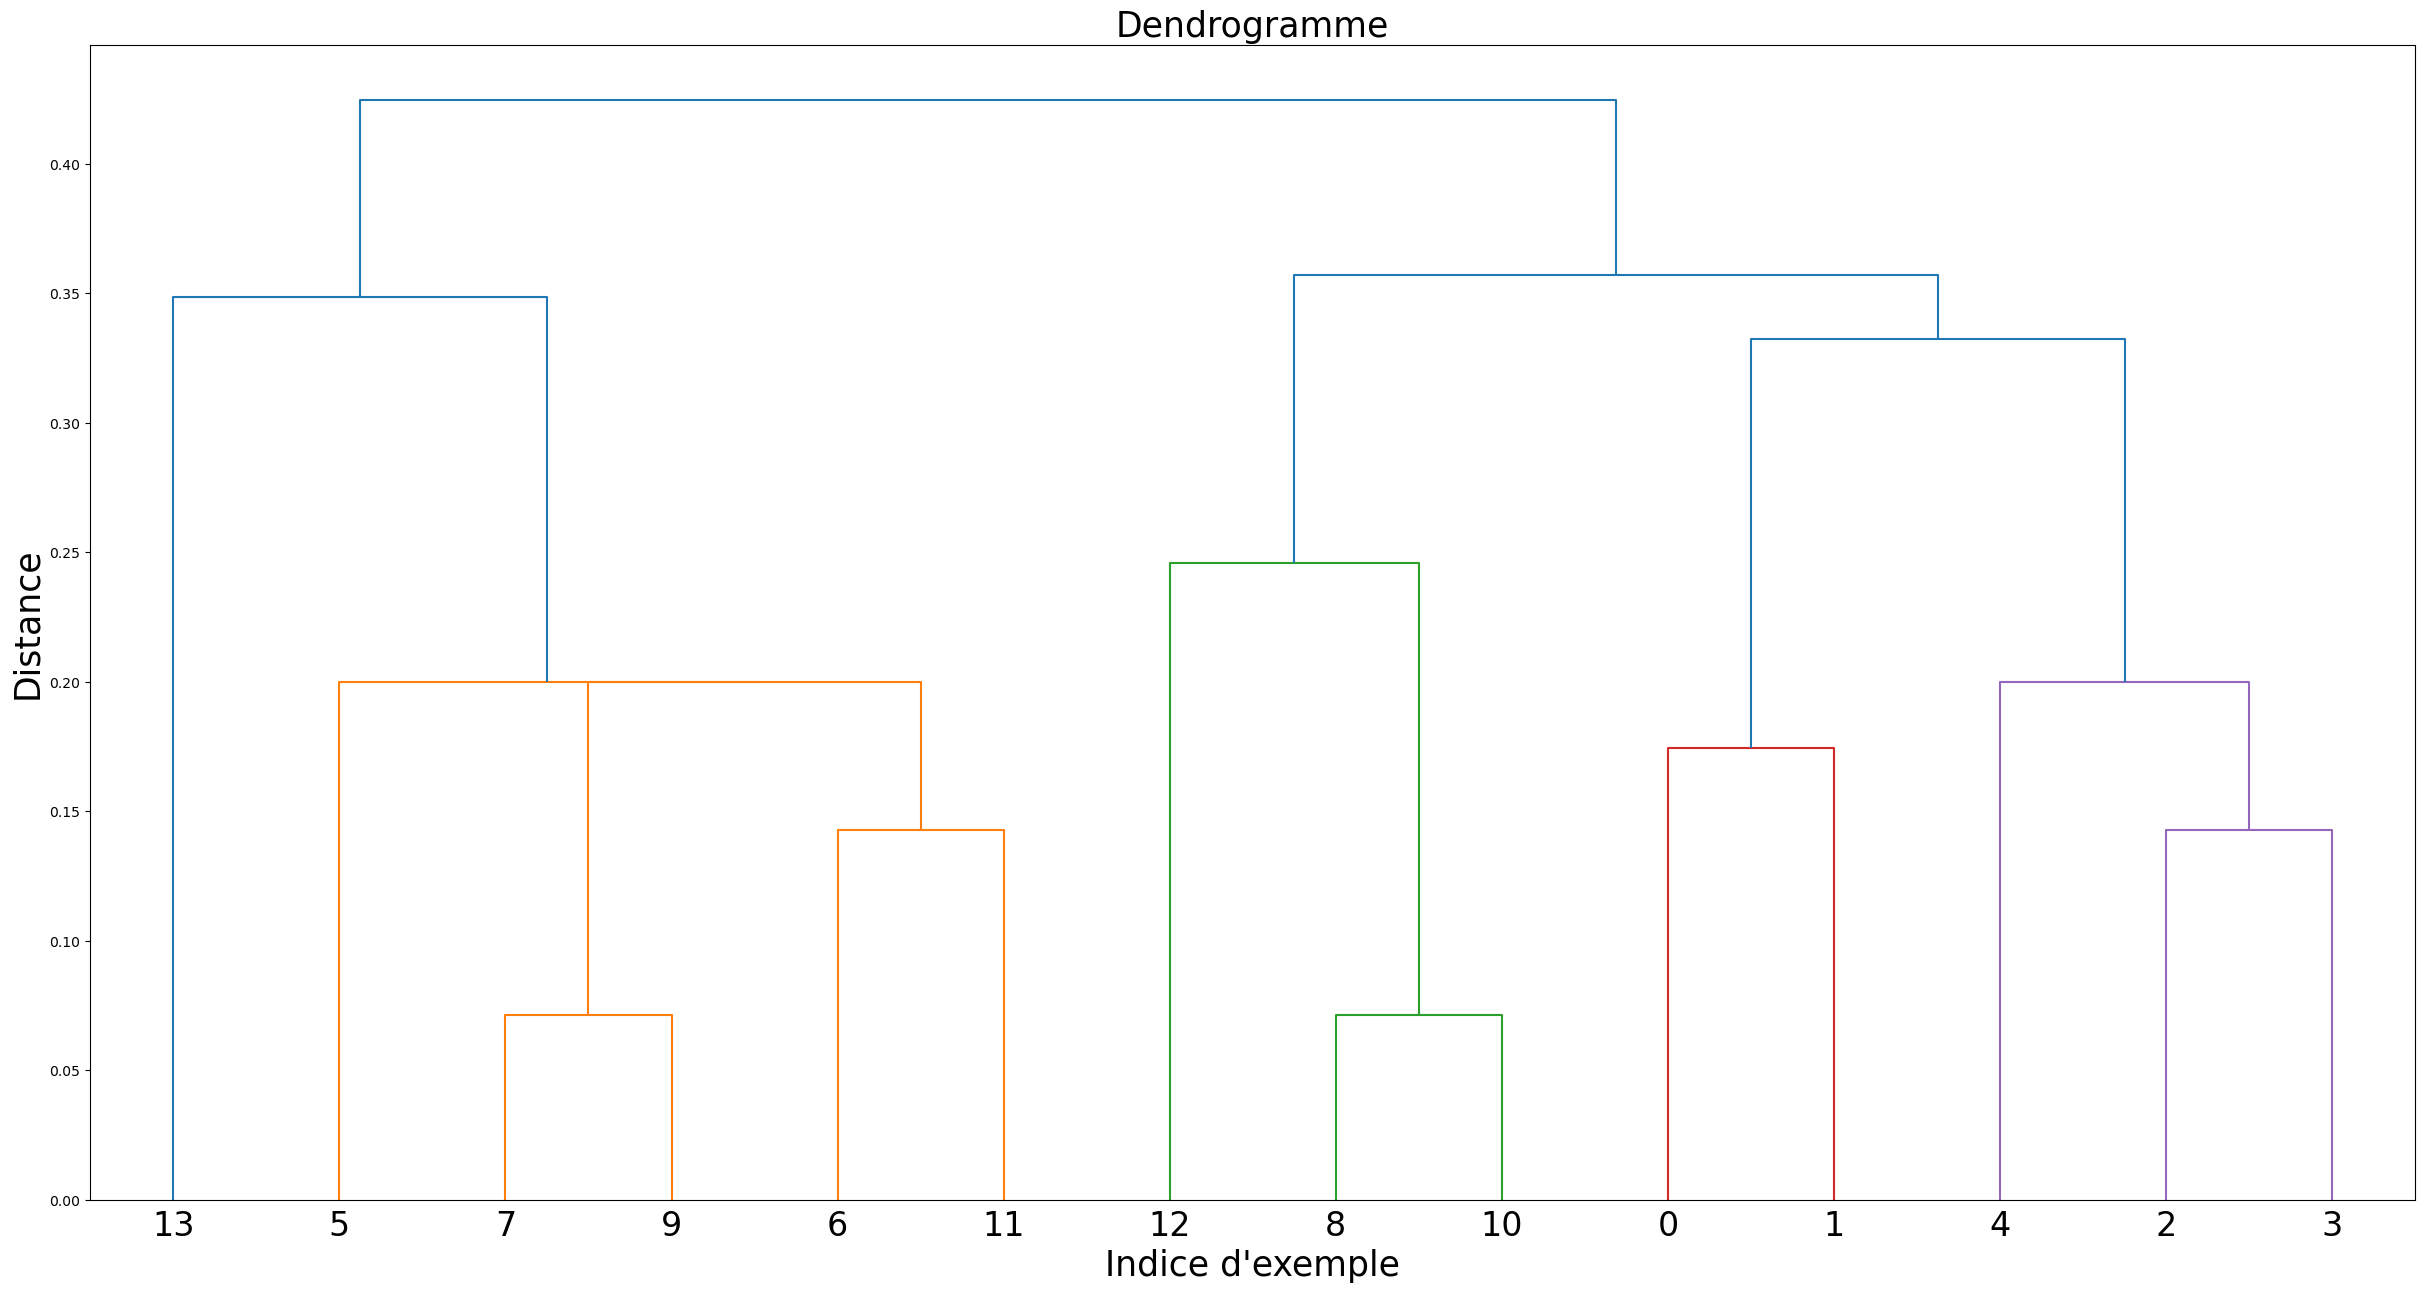

[[8, 10, 0.0714285714285714, 2],
 [7, 9, 0.07142857142857151, 2],
 [2, 3, 0.14285714285714285, 2],
 [6, 11, 0.1428571428571429, 2],
 [0, 1, 0.17437936593905287, 2],
 [15, 17, 0.19999999999999996, 4],
 [4, 16, 0.2, 3],
 [5, 19, 0.20000000000000007, 5],
 [12, 14, 0.2457807219155036, 3],
 [18, 20, 0.3322772385603716, 5],
 [13, 21, 0.3487587318781058, 6],
 [22, 23, 0.3571428571428572, 8],
 [24, 25, 0.4247448213519573, 14]]

In [33]:
CHA(data_2D_norm,linkage='simple',verbose=True,dendrogramme=True)

Distance mininimale trouvée entre  [8, 10] : 0.0714285714285714
Distance mininimale trouvée entre  [7, 9] : 0.07142857142857151
Distance mininimale trouvée entre  [2, 3] : 0.14285714285714285
Distance mininimale trouvée entre  [6, 11] : 0.1428571428571429
Distance mininimale trouvée entre  [0, 1] : 0.17437936593905287
Distance mininimale trouvée entre  [15, 17] : 0.2176313858168652
Distance mininimale trouvée entre  [4, 16] : 0.22289036095775183
Distance mininimale trouvée entre  [12, 14] : 0.2694495361626317
Distance mininimale trouvée entre  [5, 19] : 0.31302705657407515
Distance mininimale trouvée entre  [13, 22] : 0.4745491993187841
Distance mininimale trouvée entre  [20, 21] : 0.5175575371779451
Distance mininimale trouvée entre  [18, 24] : 0.6770324690297006
Distance mininimale trouvée entre  [23, 25] : 0.784963189028133


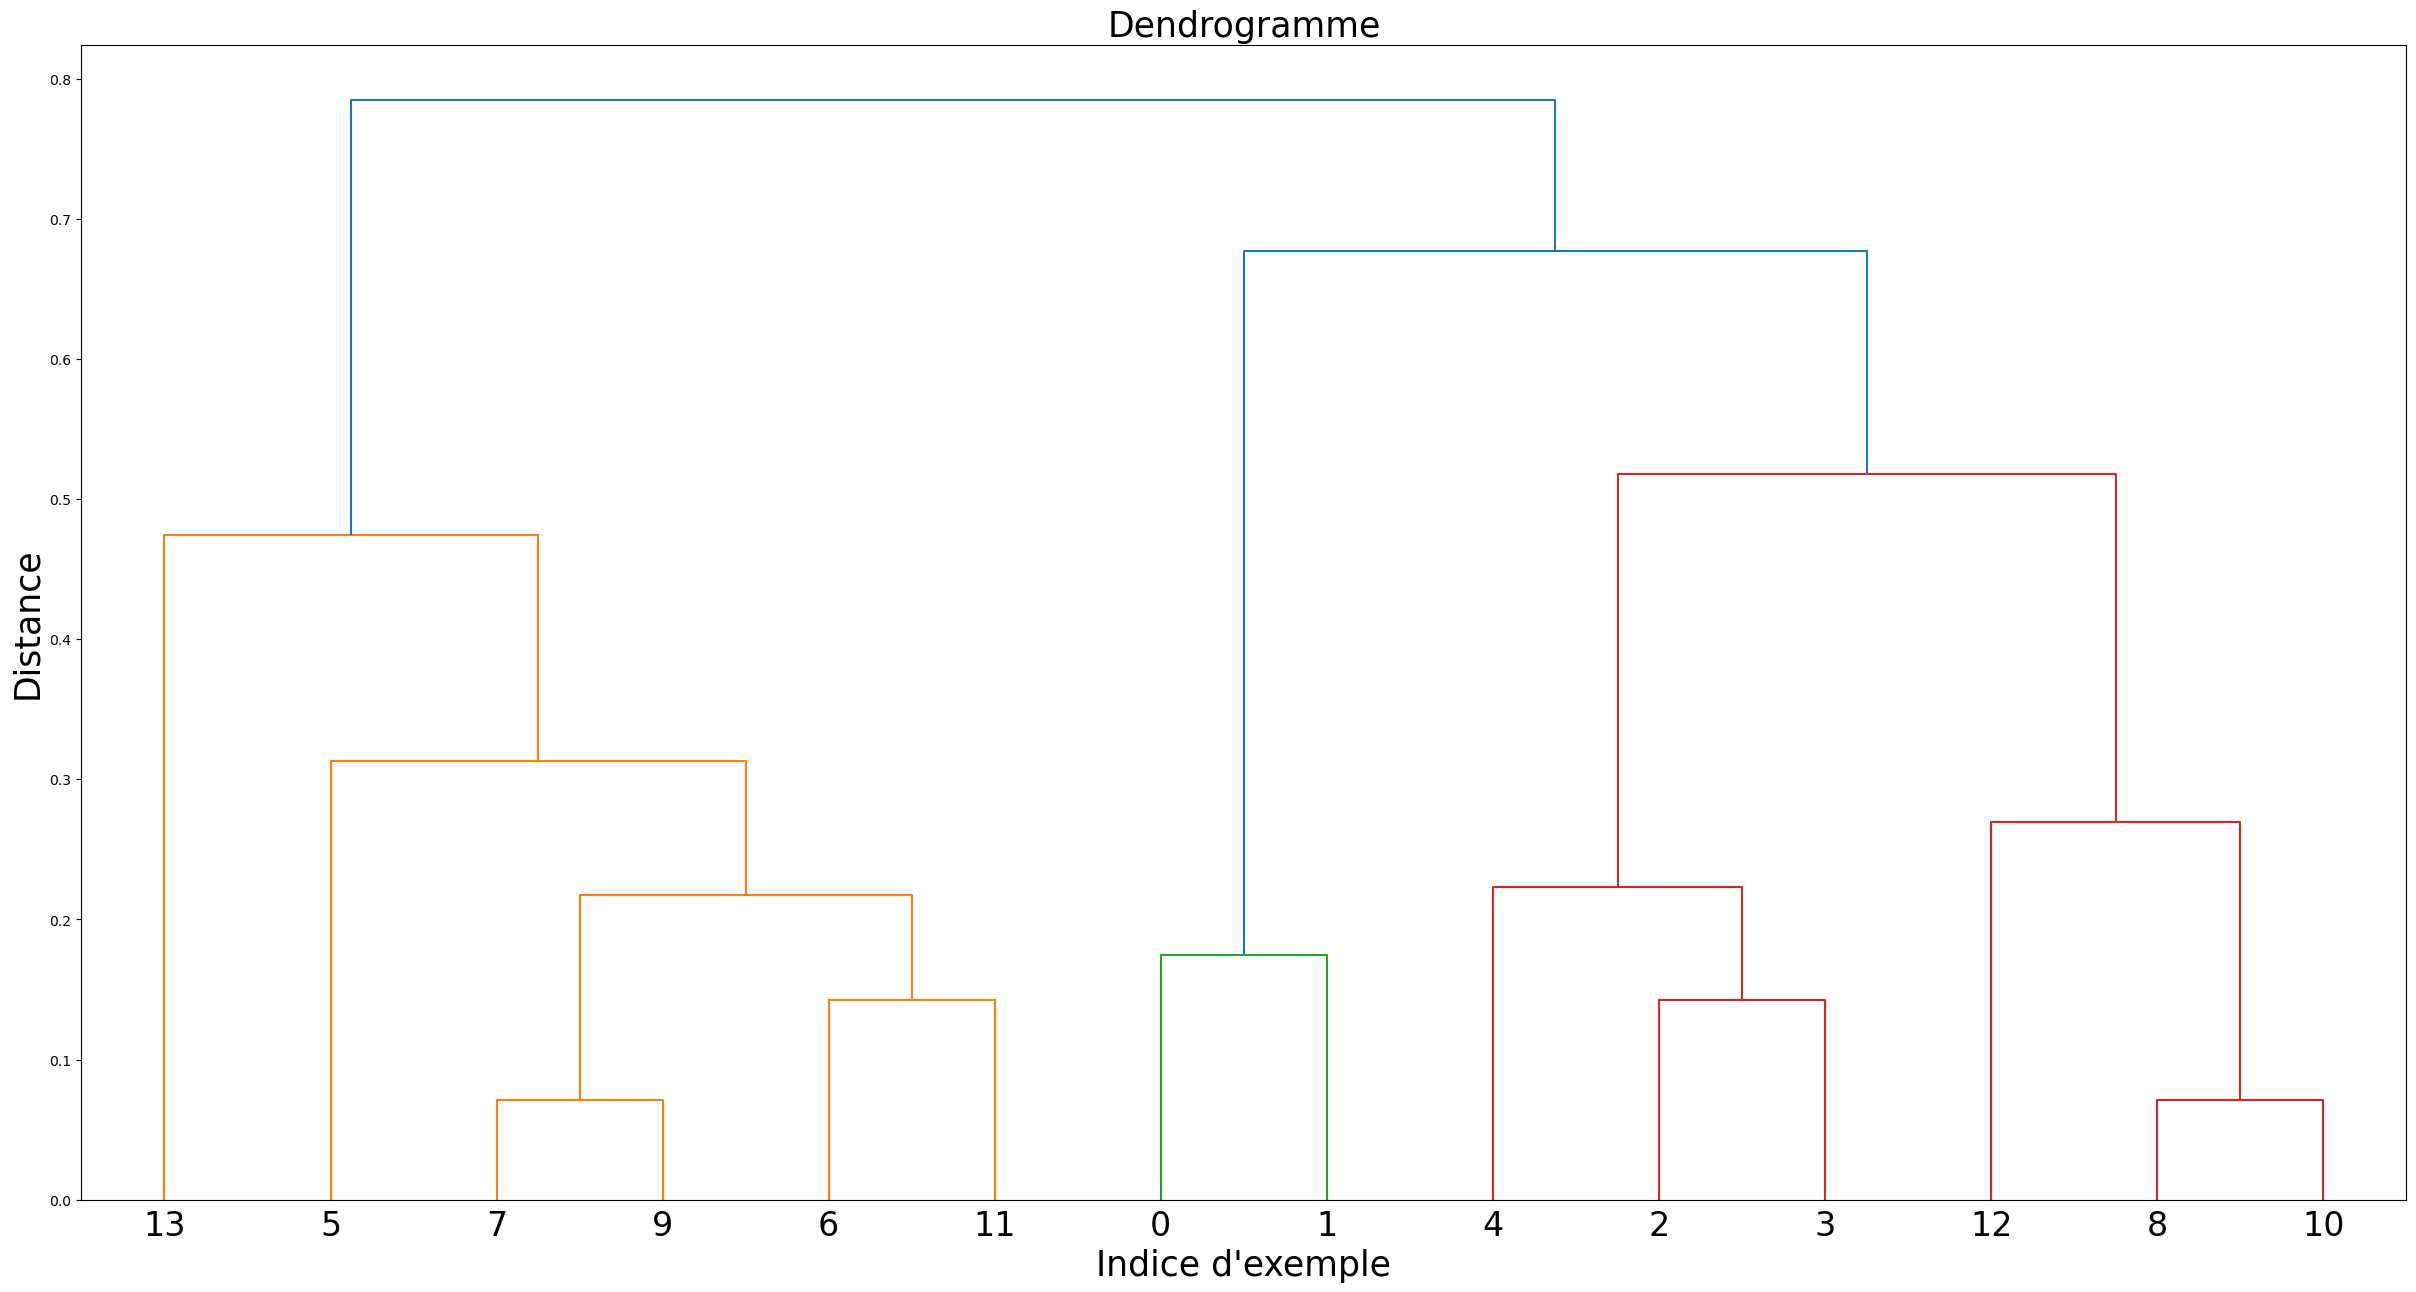

[[8, 10, 0.0714285714285714, 2],
 [7, 9, 0.07142857142857151, 2],
 [2, 3, 0.14285714285714285, 2],
 [6, 11, 0.1428571428571429, 2],
 [0, 1, 0.17437936593905287, 2],
 [15, 17, 0.2176313858168652, 4],
 [4, 16, 0.22289036095775183, 3],
 [12, 14, 0.2694495361626317, 3],
 [5, 19, 0.31302705657407515, 5],
 [13, 22, 0.4745491993187841, 6],
 [20, 21, 0.5175575371779451, 6],
 [18, 24, 0.6770324690297006, 8],
 [23, 25, 0.784963189028133, 14]]

In [34]:
CHA(data_2D_norm,linkage='average',verbose=True,dendrogramme=True)

## Ajout des fonctions dans la librairie `iads`

<font size="+1" color="RED"><b>[Q]</b></font> Ajouter les fonctions de clustering dans votre librairie `iads`. Pour cela, créer un nouveau fichier de nom `Clustering.py` dans votre répertoire `iads`. 
Utiliser les premières lignes du fichier `Classifiers.py` pour débuter votre fichier `Clustering.py`, puis rajouter dans ce fichier les fonctions de clustering hiérarchique (tous linkages) de ce notebook, ainsi que les fonctions qu'elles utilisent.

## Phase 2 : application à des données réelles

### Données: traitement des déchets de la ville de Paris

Pour tester votre implémentation, vous allez utiliser les données publiques de traitement des déchets de la ville de Paris qui sont fournies dans le fichier `base-Paris.csv`.

**Attention**: il faut préparer cette base afin de pouvoir appliquer l'algorithme de clustering: en particulier, certaines colonnes (Granularité, Total...) ne sont pas à utilisables dans le calcul des distances, il faut donc les éliminer. Il faut aussi prévoir de conserver le nom de l'arrondissement afin de pouvoir à la fin analyser le résultat du clustering.


<font size="+1" color="RED"><b>[Q]</b></font> Etudier cette base et les clusters qui peuvent être mis en évidence.


In [35]:
data_Paris = pd.read_csv("data/base-Paris.csv")

In [36]:
data_Paris

,Granularité,janv-11,févr-11,mars-11,avr-11,mai-11,juin-11,juil-11,août-11,sept-11,oct-11,nov-11,déc-11,Total-2011
0,75001,75.3,60.4,71.2,59.5,73.9,72.0,57.9,56.4,75.5,75.7,65.8,79.1,822.7
1,75002,153.0,125.8,136.6,126.6,133.2,127.6,126.7,114.3,144.3,145.1,129.5,129.8,1592.5
2,75003,183.9,173.1,204.2,183.0,203.2,181.9,191.2,153.6,208.6,186.5,192.9,189.9,2252.0
3,75004,116.3,115.7,133.4,115.0,123.2,120.5,114.5,97.6,130.5,123.0,124.3,133.7,1447.7
4,75005,247.0,211.0,251.0,218.0,185.0,224.0,213.3,162.9,203.4,232.1,227.6,251.6,2626.9
5,75006,222.0,189.0,218.0,192.0,180.0,199.0,171.8,134.8,183.1,195.5,213.8,204.1,2303.1
6,75007,288.1,249.1,303.7,255.8,287.8,288.4,249.6,185.6,281.3,284.3,296.4,301.1,3271.2
7,75008,252.6,246.7,252.9,232.5,199.4,236.4,175.4,189.4,266.6,230.3,257.7,224.4,2764.3
8,75009,208.3,197.1,220.4,197.9,151.7,206.9,199.9,163.3,223.8,203.6,213.8,235.7,2422.4
9,75010,273.0,248.6,292.2,255.2,284.3,267.3,246.6,210.3,280.6,275.6,284.6,283.2,3201.5


<font size="+1" color="RED"><b>[Q]</b></font> Préparer un rapport d'analyse (c'est-à-dire, compléter votre notebook en rajoutant à la suite tout un ensemble d'expérimentations et de résultats obtenus sur la base) réalisé sur cette base qui mette en évidence les clusters existants à différents niveaux de distance, et en utilisant différentes distances.


In [37]:
# récuperer juste les noms des colonnes de la dataframe
data_Paris.columns

Index(['Granularité', 'janv-11', 'févr-11', 'mars-11', 'avr-11', 'mai-11',
       'juin-11', 'juil-11', 'août-11', 'sept-11', 'oct-11', 'nov-11',
       'déc-11', 'Total-2011'],
      dtype='object')

In [38]:
# On ne garde que les variables numériques en supprimant les colonnes 'Granularite' et 'Total'
data_Paris_num = data_Paris.drop(columns=["Granularité", "Total-2011"])

# On supprime la dernière ligne car elle contient le total des colonnes
data_Paris_num = data_Paris_num.drop(data_Paris_num.index[-1])

data_Paris_num

,janv-11,févr-11,mars-11,avr-11,mai-11,juin-11,juil-11,août-11,sept-11,oct-11,nov-11,déc-11
0,75.3,60.4,71.2,59.5,73.9,72.0,57.9,56.4,75.5,75.7,65.8,79.1
1,153.0,125.8,136.6,126.6,133.2,127.6,126.7,114.3,144.3,145.1,129.5,129.8
2,183.9,173.1,204.2,183.0,203.2,181.9,191.2,153.6,208.6,186.5,192.9,189.9
3,116.3,115.7,133.4,115.0,123.2,120.5,114.5,97.6,130.5,123.0,124.3,133.7
4,247.0,211.0,251.0,218.0,185.0,224.0,213.3,162.9,203.4,232.1,227.6,251.6
5,222.0,189.0,218.0,192.0,180.0,199.0,171.8,134.8,183.1,195.5,213.8,204.1
6,288.1,249.1,303.7,255.8,287.8,288.4,249.6,185.6,281.3,284.3,296.4,301.1
7,252.6,246.7,252.9,232.5,199.4,236.4,175.4,189.4,266.6,230.3,257.7,224.4
8,208.3,197.1,220.4,197.9,151.7,206.9,199.9,163.3,223.8,203.6,213.8,235.7
9,273.0,248.6,292.2,255.2,284.3,267.3,246.6,210.3,280.6,275.6,284.6,283.2


In [39]:
# On normalise les données
data_Paris_num_norm = normalisation(data_Paris_num)
data_Paris_num_norm

,janv-11,févr-11,mars-11,avr-11,mai-11,juin-11,juil-11,août-11,sept-11,oct-11,nov-11,déc-11
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.093863,0.088259,0.075493,0.086469,0.073857,0.068087,0.120511,0.093629,0.082120,0.086426,0.076756,0.059181
2,0.131191,0.152092,0.153526,0.159149,0.161041,0.134582,0.233491,0.157180,0.158868,0.137983,0.153151,0.129333
3,0.049529,0.074629,0.071800,0.071521,0.061402,0.059393,0.099142,0.066624,0.065648,0.058904,0.070490,0.063733
4,0.207417,0.203239,0.207549,0.204253,0.138373,0.186138,0.272202,0.172219,0.152662,0.194770,0.194963,0.201354
5,0.177217,0.173549,0.169456,0.170747,0.132146,0.155523,0.199510,0.126779,0.128432,0.149191,0.178335,0.145909
6,0.257067,0.254656,0.268383,0.252964,0.266409,0.265001,0.335786,0.208926,0.245643,0.259776,0.277865,0.259134
7,0.214182,0.251417,0.209743,0.222938,0.156308,0.201323,0.205815,0.215071,0.228097,0.192528,0.231233,0.169604
8,0.160667,0.184480,0.172227,0.178351,0.096899,0.165197,0.248730,0.172865,0.177011,0.159278,0.178335,0.182794
9,0.238826,0.253981,0.255108,0.252191,0.262050,0.239162,0.330531,0.248868,0.244808,0.248941,0.263646,0.238240


Distance mininimale trouvée entre  [6, 9] : 0.05980330904516489
Distance mininimale trouvée entre  [1, 3] : 0.0699559695681218
Distance mininimale trouvée entre  [13, 16] : 0.09034538002040293
Distance mininimale trouvée entre  [2, 5] : 0.09099688490823389
Distance mininimale trouvée entre  [8, 23] : 0.09608457631845164
Distance mininimale trouvée entre  [17, 22] : 0.12348584942545547
Distance mininimale trouvée entre  [4, 24] : 0.1245340704519608
Distance mininimale trouvée entre  [10, 25] : 0.1553231849516947
Distance mininimale trouvée entre  [7, 26] : 0.16357044635684204
Distance mininimale trouvée entre  [11, 27] : 0.18121390919588642
Distance mininimale trouvée entre  [18, 19] : 0.24168540846465464
Distance mininimale trouvée entre  [0, 21] : 0.26550417696685485
Distance mininimale trouvée entre  [12, 15] : 0.2757063809341908
Distance mininimale trouvée entre  [20, 28] : 0.2890866853003415
Distance mininimale trouvée entre  [29, 30] : 0.4321158905664246
Distance mininimale trouvé

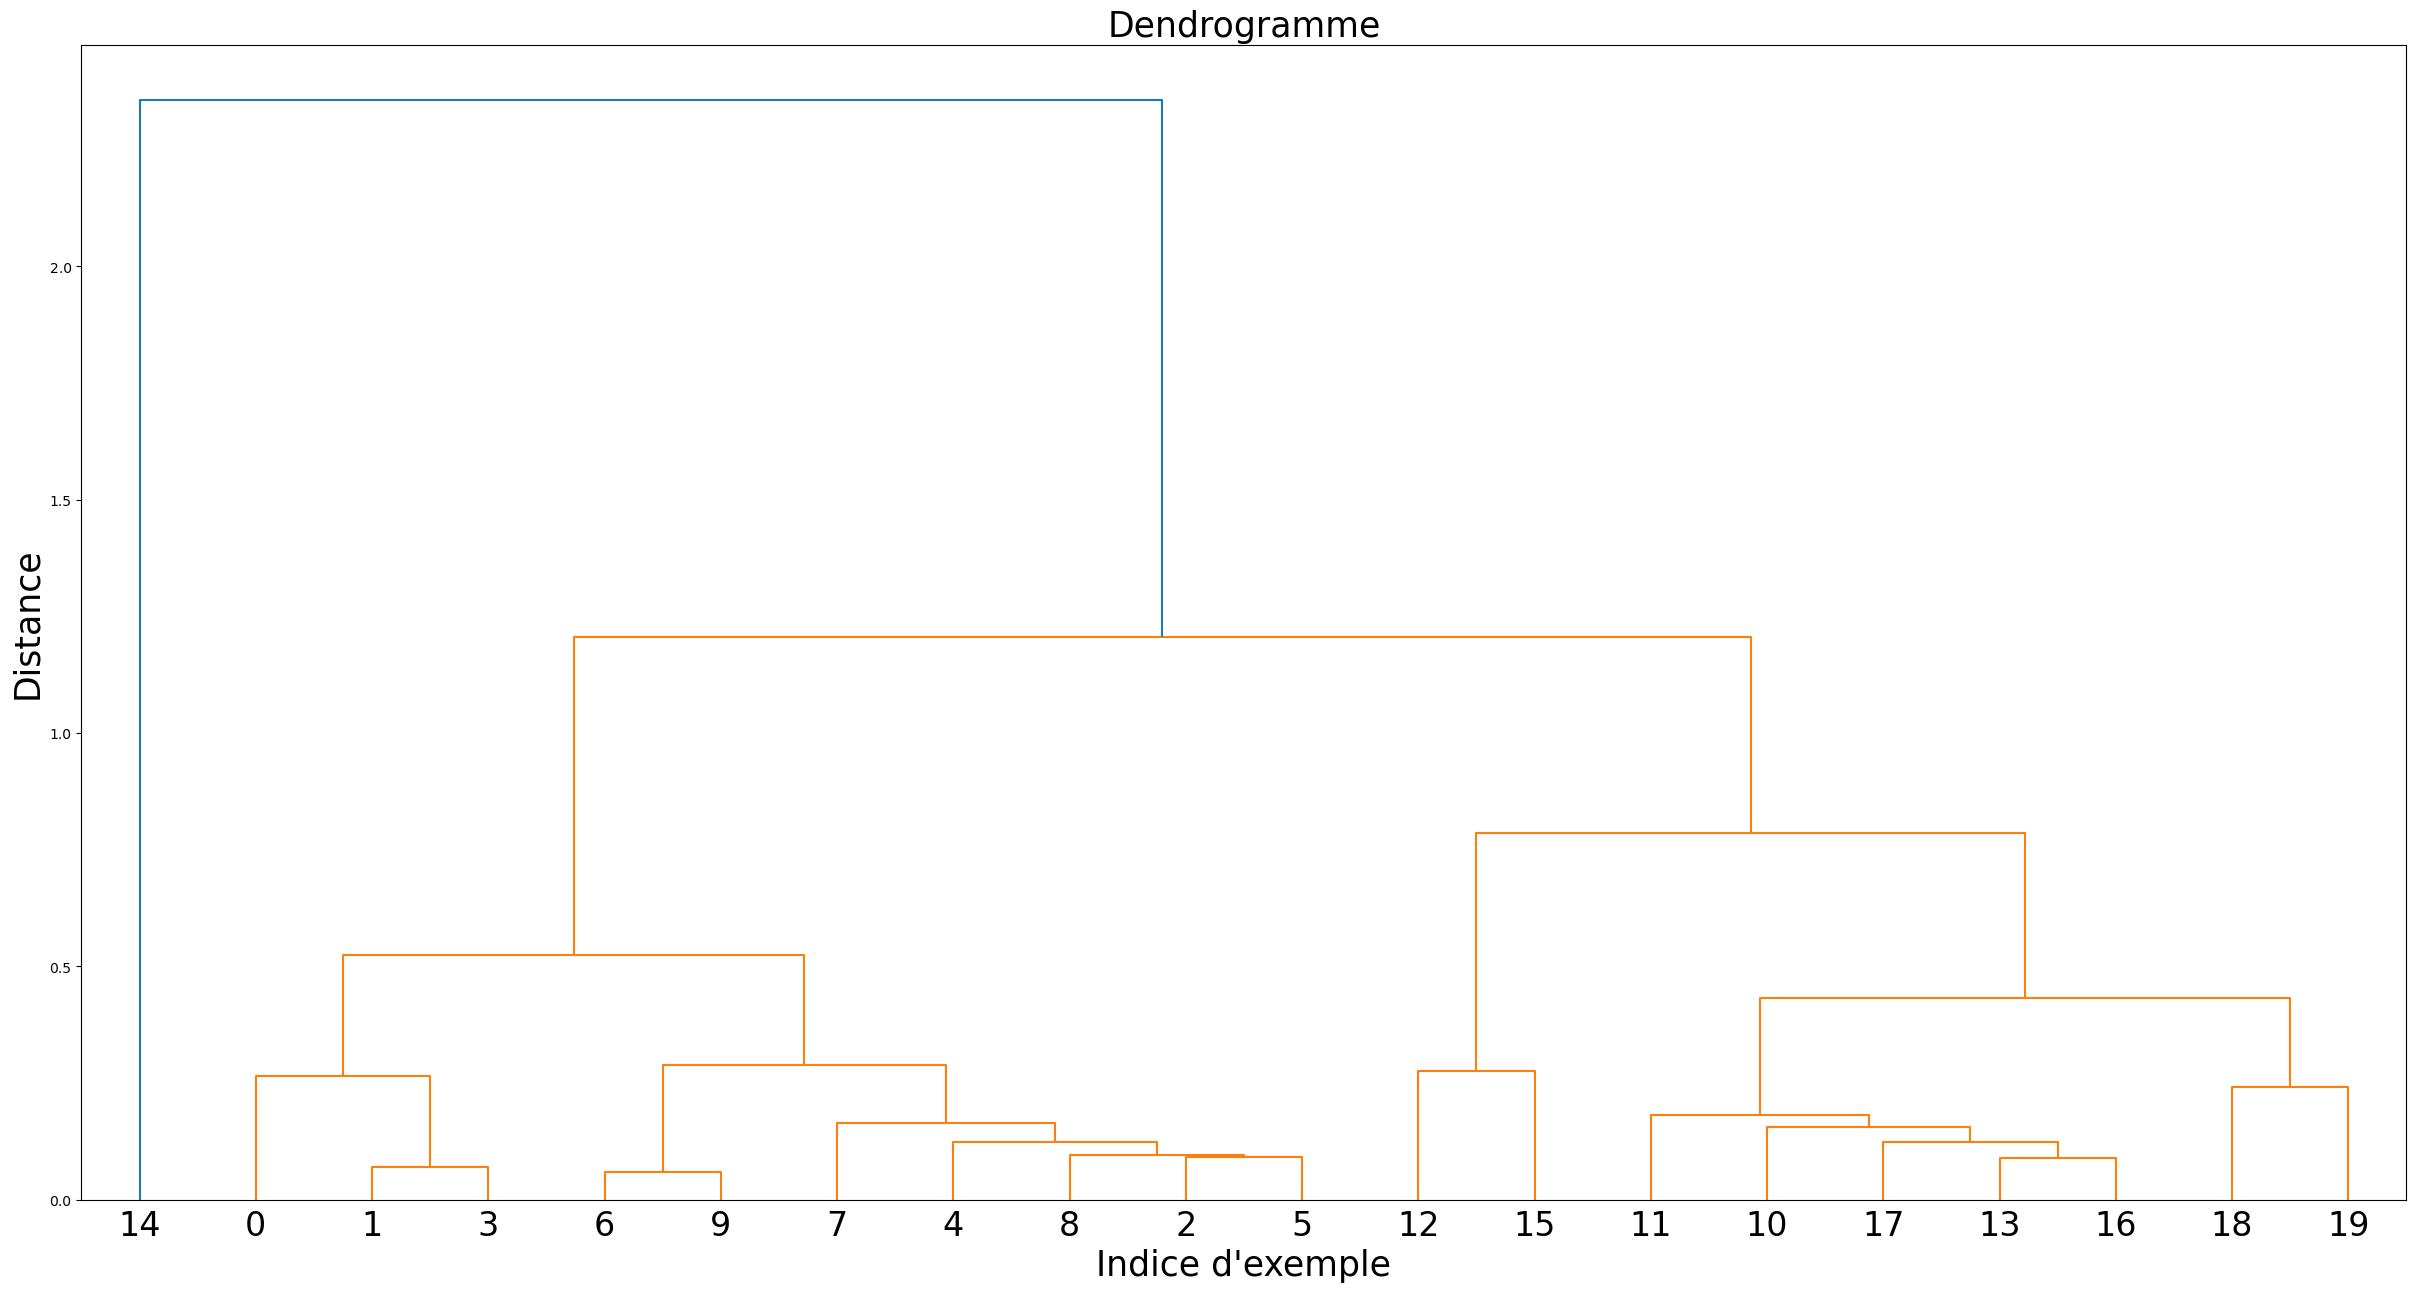

[[6, 9, 0.05980330904516489, 2],
 [1, 3, 0.0699559695681218, 2],
 [13, 16, 0.09034538002040293, 2],
 [2, 5, 0.09099688490823389, 2],
 [8, 23, 0.09608457631845164, 3],
 [17, 22, 0.12348584942545547, 3],
 [4, 24, 0.1245340704519608, 4],
 [10, 25, 0.1553231849516947, 4],
 [7, 26, 0.16357044635684204, 5],
 [11, 27, 0.18121390919588642, 5],
 [18, 19, 0.24168540846465464, 2],
 [0, 21, 0.26550417696685485, 3],
 [12, 15, 0.2757063809341908, 2],
 [20, 28, 0.2890866853003415, 7],
 [29, 30, 0.4321158905664246, 7],
 [31, 33, 0.5247503537641786, 10],
 [32, 34, 0.7861301125077121, 9],
 [35, 36, 1.2057059027244827, 19],
 [14, 37, 2.357153341249612, 20]]

In [40]:
# On affiche le dendrogramme
CHA(data_Paris_num_norm,linkage='centroid',verbose=True,dendrogramme=True)

Distance mininimale trouvée entre  [6, 9] : 0.05980330904516489
Distance mininimale trouvée entre  [1, 3] : 0.06995596956812182
Distance mininimale trouvée entre  [13, 16] : 0.09034538002040293
Distance mininimale trouvée entre  [2, 5] : 0.09099688490823389
Distance mininimale trouvée entre  [4, 8] : 0.09818154292330362
Distance mininimale trouvée entre  [10, 17] : 0.14588555433594885
Distance mininimale trouvée entre  [7, 24] : 0.16088812240051226
Distance mininimale trouvée entre  [11, 25] : 0.19956051562208726
Distance mininimale trouvée entre  [22, 27] : 0.21873669355625952
Distance mininimale trouvée entre  [23, 26] : 0.2192318254370334
Distance mininimale trouvée entre  [18, 19] : 0.24168540846465464
Distance mininimale trouvée entre  [12, 15] : 0.2757063809341908
Distance mininimale trouvée entre  [0, 21] : 0.294555978772269
Distance mininimale trouvée entre  [20, 29] : 0.37996811342190495
Distance mininimale trouvée entre  [28, 30] : 0.6520458836797397
Distance mininimale trouv

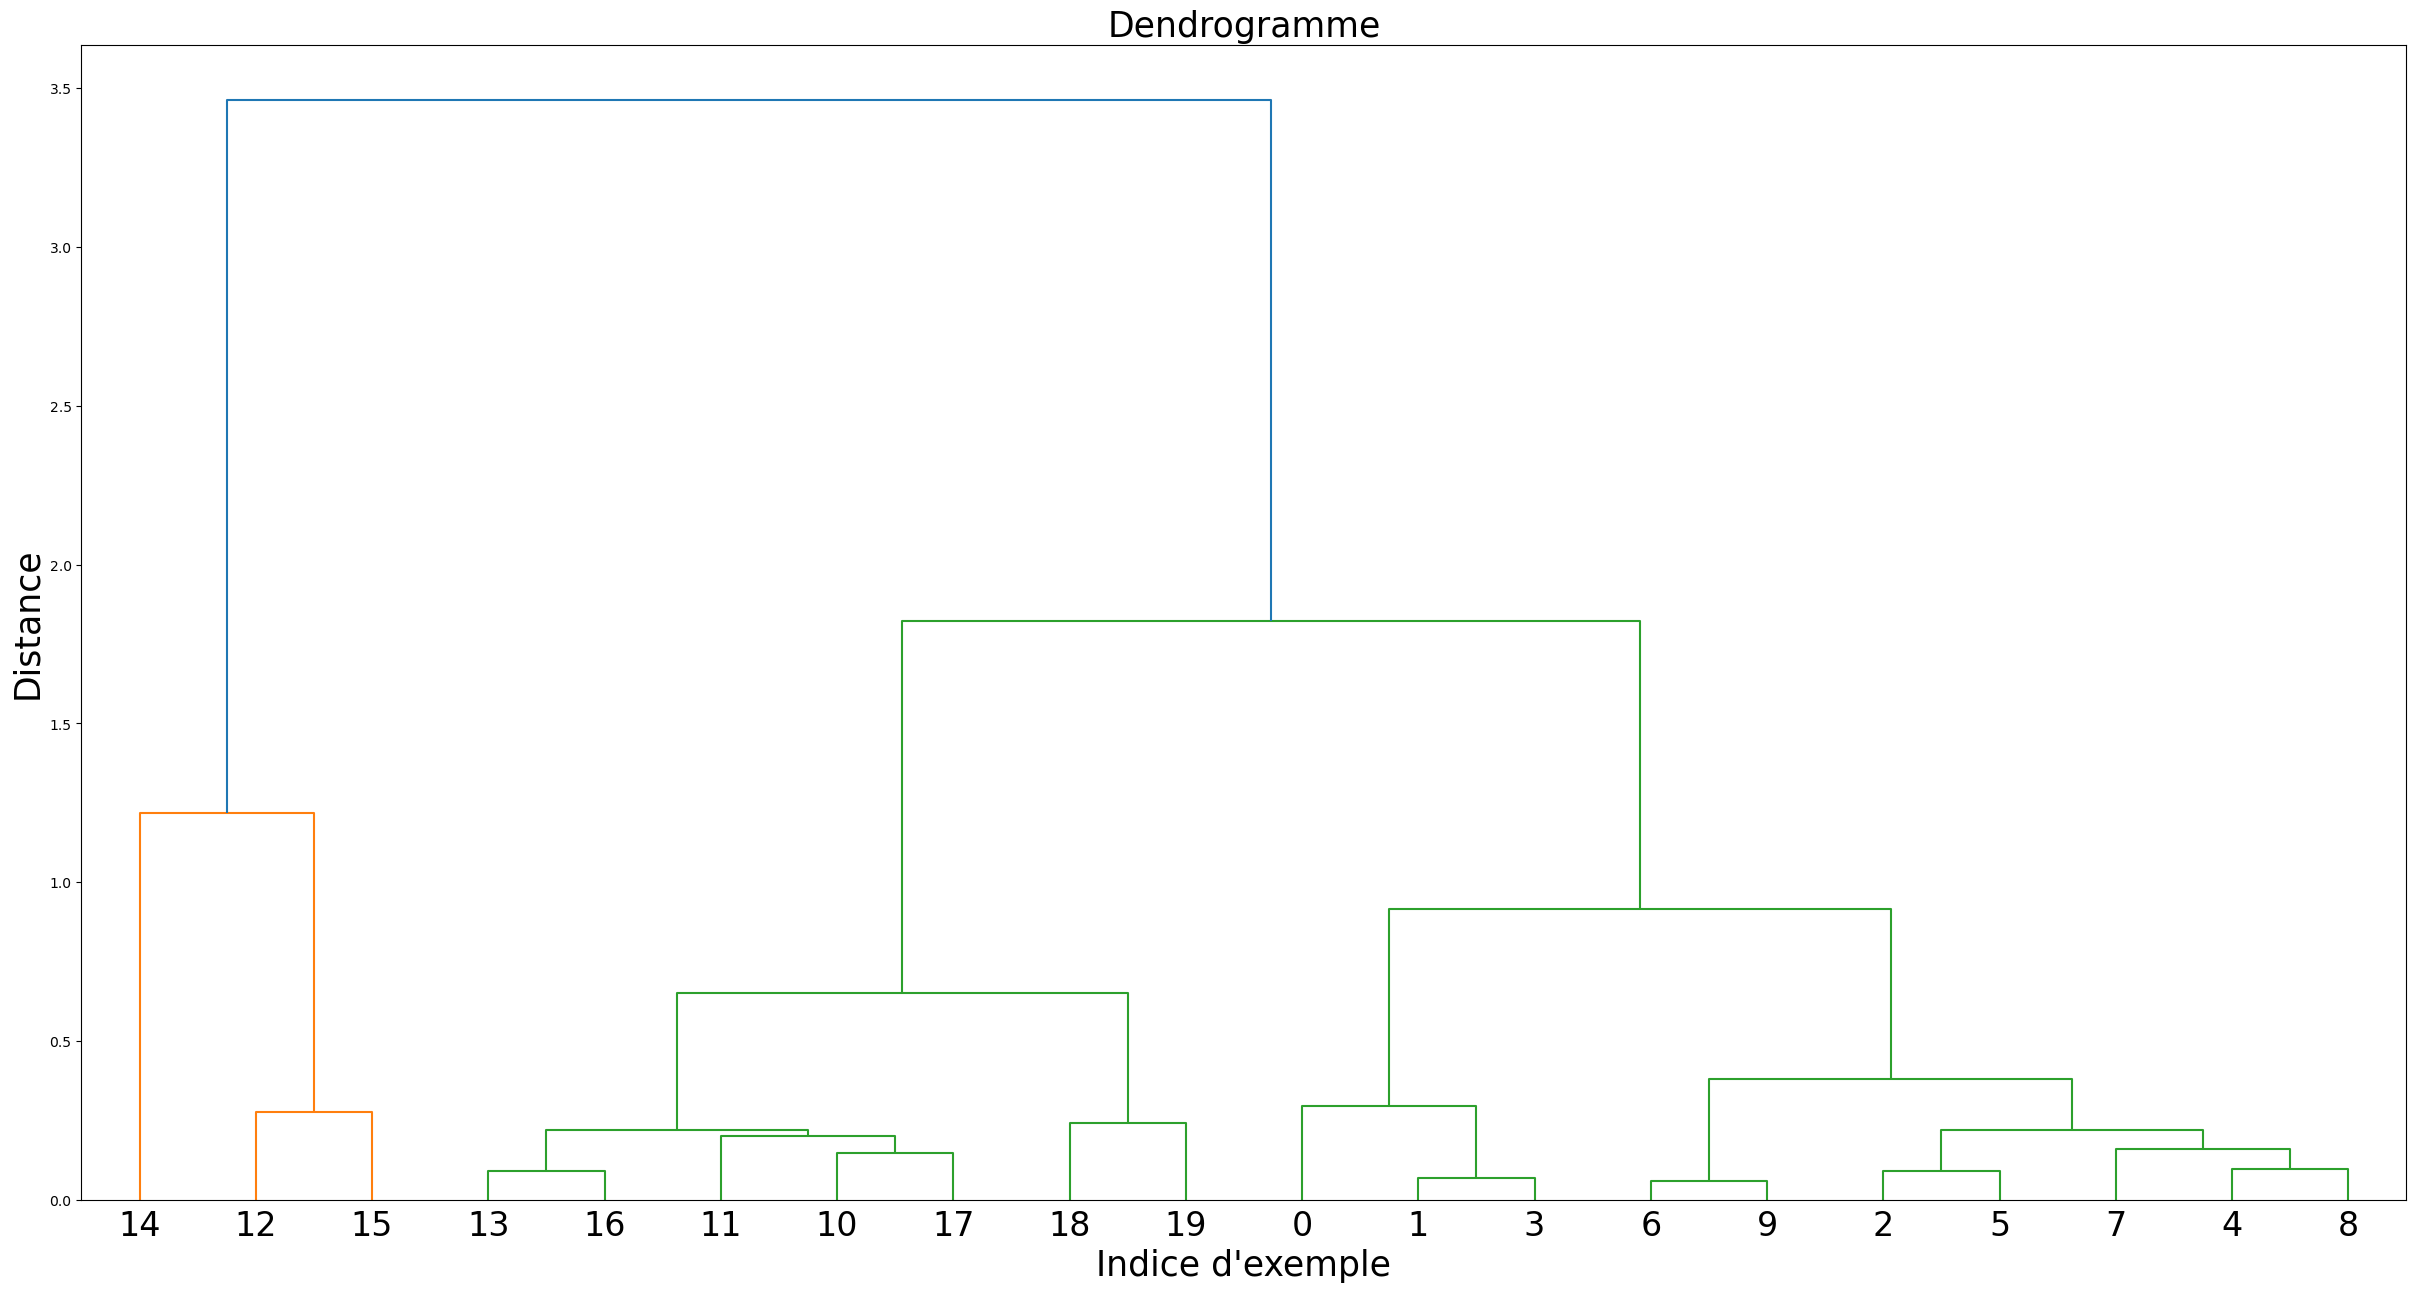

[[6, 9, 0.05980330904516489, 2],
 [1, 3, 0.06995596956812182, 2],
 [13, 16, 0.09034538002040293, 2],
 [2, 5, 0.09099688490823389, 2],
 [4, 8, 0.09818154292330362, 2],
 [10, 17, 0.14588555433594885, 2],
 [7, 24, 0.16088812240051226, 3],
 [11, 25, 0.19956051562208726, 3],
 [22, 27, 0.21873669355625952, 5],
 [23, 26, 0.2192318254370334, 5],
 [18, 19, 0.24168540846465464, 2],
 [12, 15, 0.2757063809341908, 2],
 [0, 21, 0.294555978772269, 3],
 [20, 29, 0.37996811342190495, 7],
 [28, 30, 0.6520458836797397, 7],
 [32, 33, 0.9147339159658285, 10],
 [14, 31, 1.2174824146179026, 3],
 [34, 35, 1.8216805757605725, 17],
 [36, 37, 3.4641016151377544, 20]]

In [41]:
CHA(data_Paris_num_norm,linkage='complete',verbose=True,dendrogramme=True)

Distance mininimale trouvée entre  [6, 9] : 0.05980330904516489
Distance mininimale trouvée entre  [1, 3] : 0.06995596956812182
Distance mininimale trouvée entre  [13, 16] : 0.09034538002040293
Distance mininimale trouvée entre  [2, 5] : 0.09099688490823389
Distance mininimale trouvée entre  [17, 22] : 0.09479475647793836
Distance mininimale trouvée entre  [4, 8] : 0.09818154292330362
Distance mininimale trouvée entre  [23, 25] : 0.10081546857637981
Distance mininimale trouvée entre  [7, 26] : 0.13242234898140426
Distance mininimale trouvée entre  [10, 24] : 0.14588555433594885
Distance mininimale trouvée entre  [11, 28] : 0.1943305954741654
Distance mininimale trouvée entre  [20, 27] : 0.2050855909122427
Distance mininimale trouvée entre  [0, 21] : 0.2380517384568165
Distance mininimale trouvée entre  [18, 19] : 0.24168540846465464
Distance mininimale trouvée entre  [30, 31] : 0.25489481925527674
Distance mininimale trouvée entre  [12, 15] : 0.2757063809341908
Distance mininimale trou

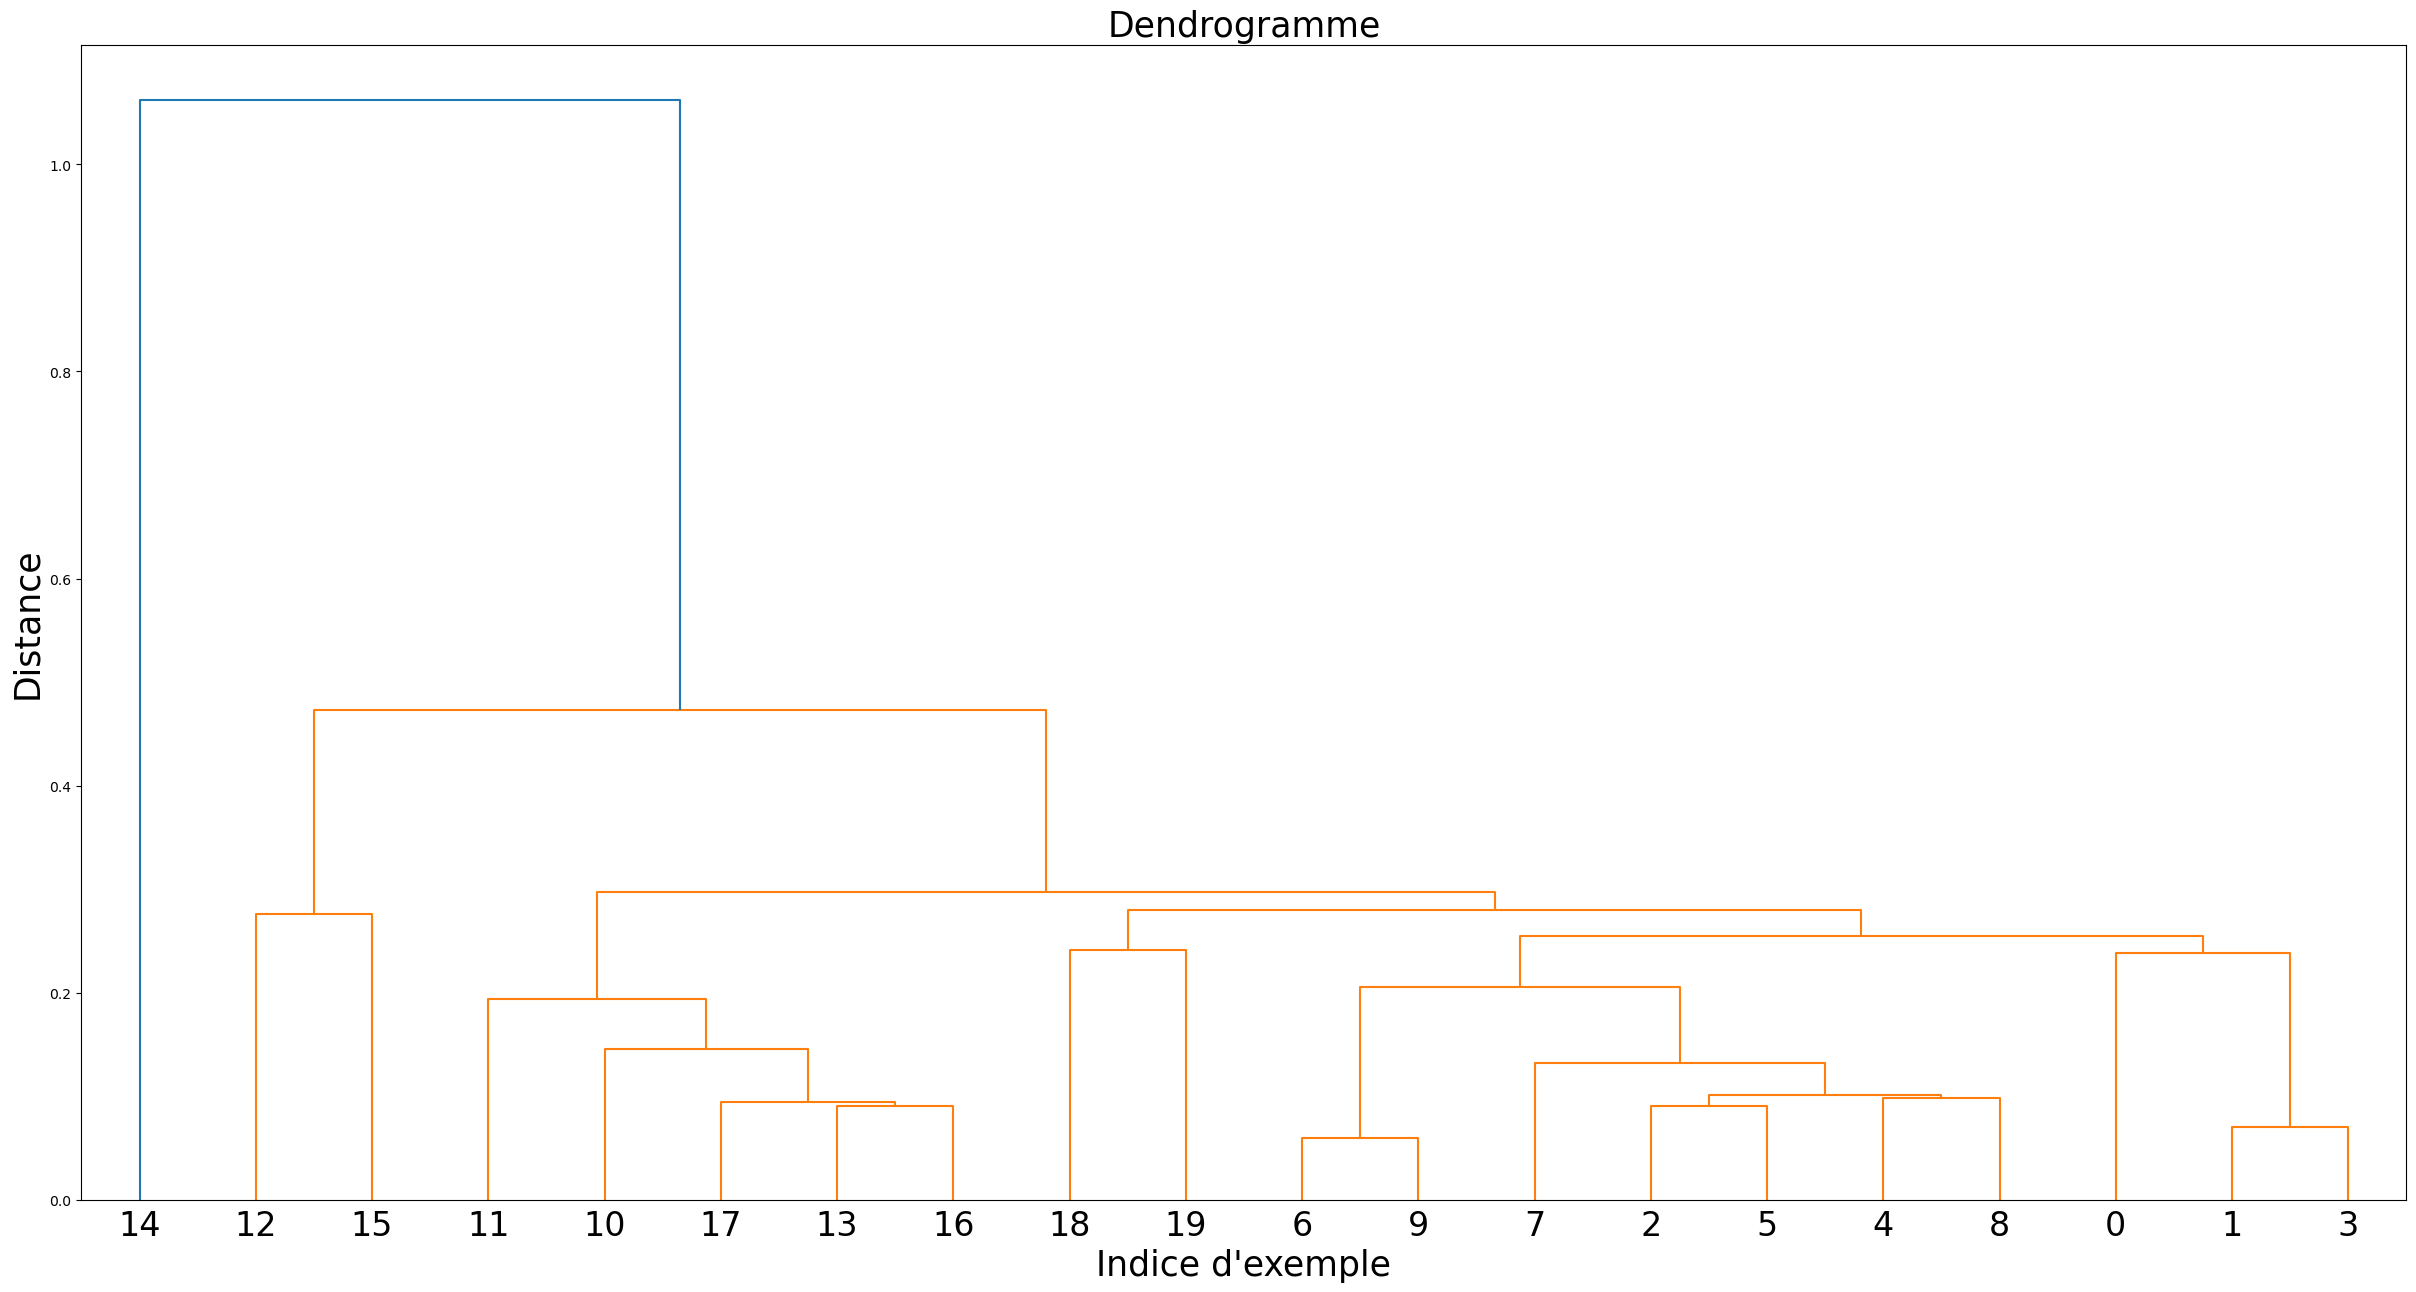

[[6, 9, 0.05980330904516489, 2],
 [1, 3, 0.06995596956812182, 2],
 [13, 16, 0.09034538002040293, 2],
 [2, 5, 0.09099688490823389, 2],
 [17, 22, 0.09479475647793836, 3],
 [4, 8, 0.09818154292330362, 2],
 [23, 25, 0.10081546857637981, 4],
 [7, 26, 0.13242234898140426, 5],
 [10, 24, 0.14588555433594885, 4],
 [11, 28, 0.1943305954741654, 5],
 [20, 27, 0.2050855909122427, 7],
 [0, 21, 0.2380517384568165, 3],
 [18, 19, 0.24168540846465464, 2],
 [30, 31, 0.25489481925527674, 10],
 [12, 15, 0.2757063809341908, 2],
 [32, 33, 0.2797887794973045, 12],
 [29, 35, 0.2974519174515183, 17],
 [34, 36, 0.4732632387615004, 19],
 [14, 37, 1.06248912283028, 20]]

In [42]:
CHA(data_Paris_num_norm,linkage='simple',verbose=True,dendrogramme=True)

Distance mininimale trouvée entre  [6, 9] : 0.05980330904516489
Distance mininimale trouvée entre  [1, 3] : 0.06995596956812182
Distance mininimale trouvée entre  [13, 16] : 0.09034538002040293
Distance mininimale trouvée entre  [2, 5] : 0.09099688490823389
Distance mininimale trouvée entre  [4, 8] : 0.09818154292330362
Distance mininimale trouvée entre  [17, 22] : 0.12738582741517274
Distance mininimale trouvée entre  [23, 24] : 0.12946815209263537
Distance mininimale trouvée entre  [10, 25] : 0.16780348491242672
Distance mininimale trouvée entre  [7, 26] : 0.17652494678428082
Distance mininimale trouvée entre  [11, 27] : 0.20205758514354327
Distance mininimale trouvée entre  [18, 19] : 0.24168540846465464
Distance mininimale trouvée entre  [0, 21] : 0.26630385861454275
Distance mininimale trouvée entre  [12, 15] : 0.2757063809341908
Distance mininimale trouvée entre  [20, 28] : 0.29903837696397984
Distance mininimale trouvée entre  [29, 30] : 0.4494535894504471
Distance mininimale tr

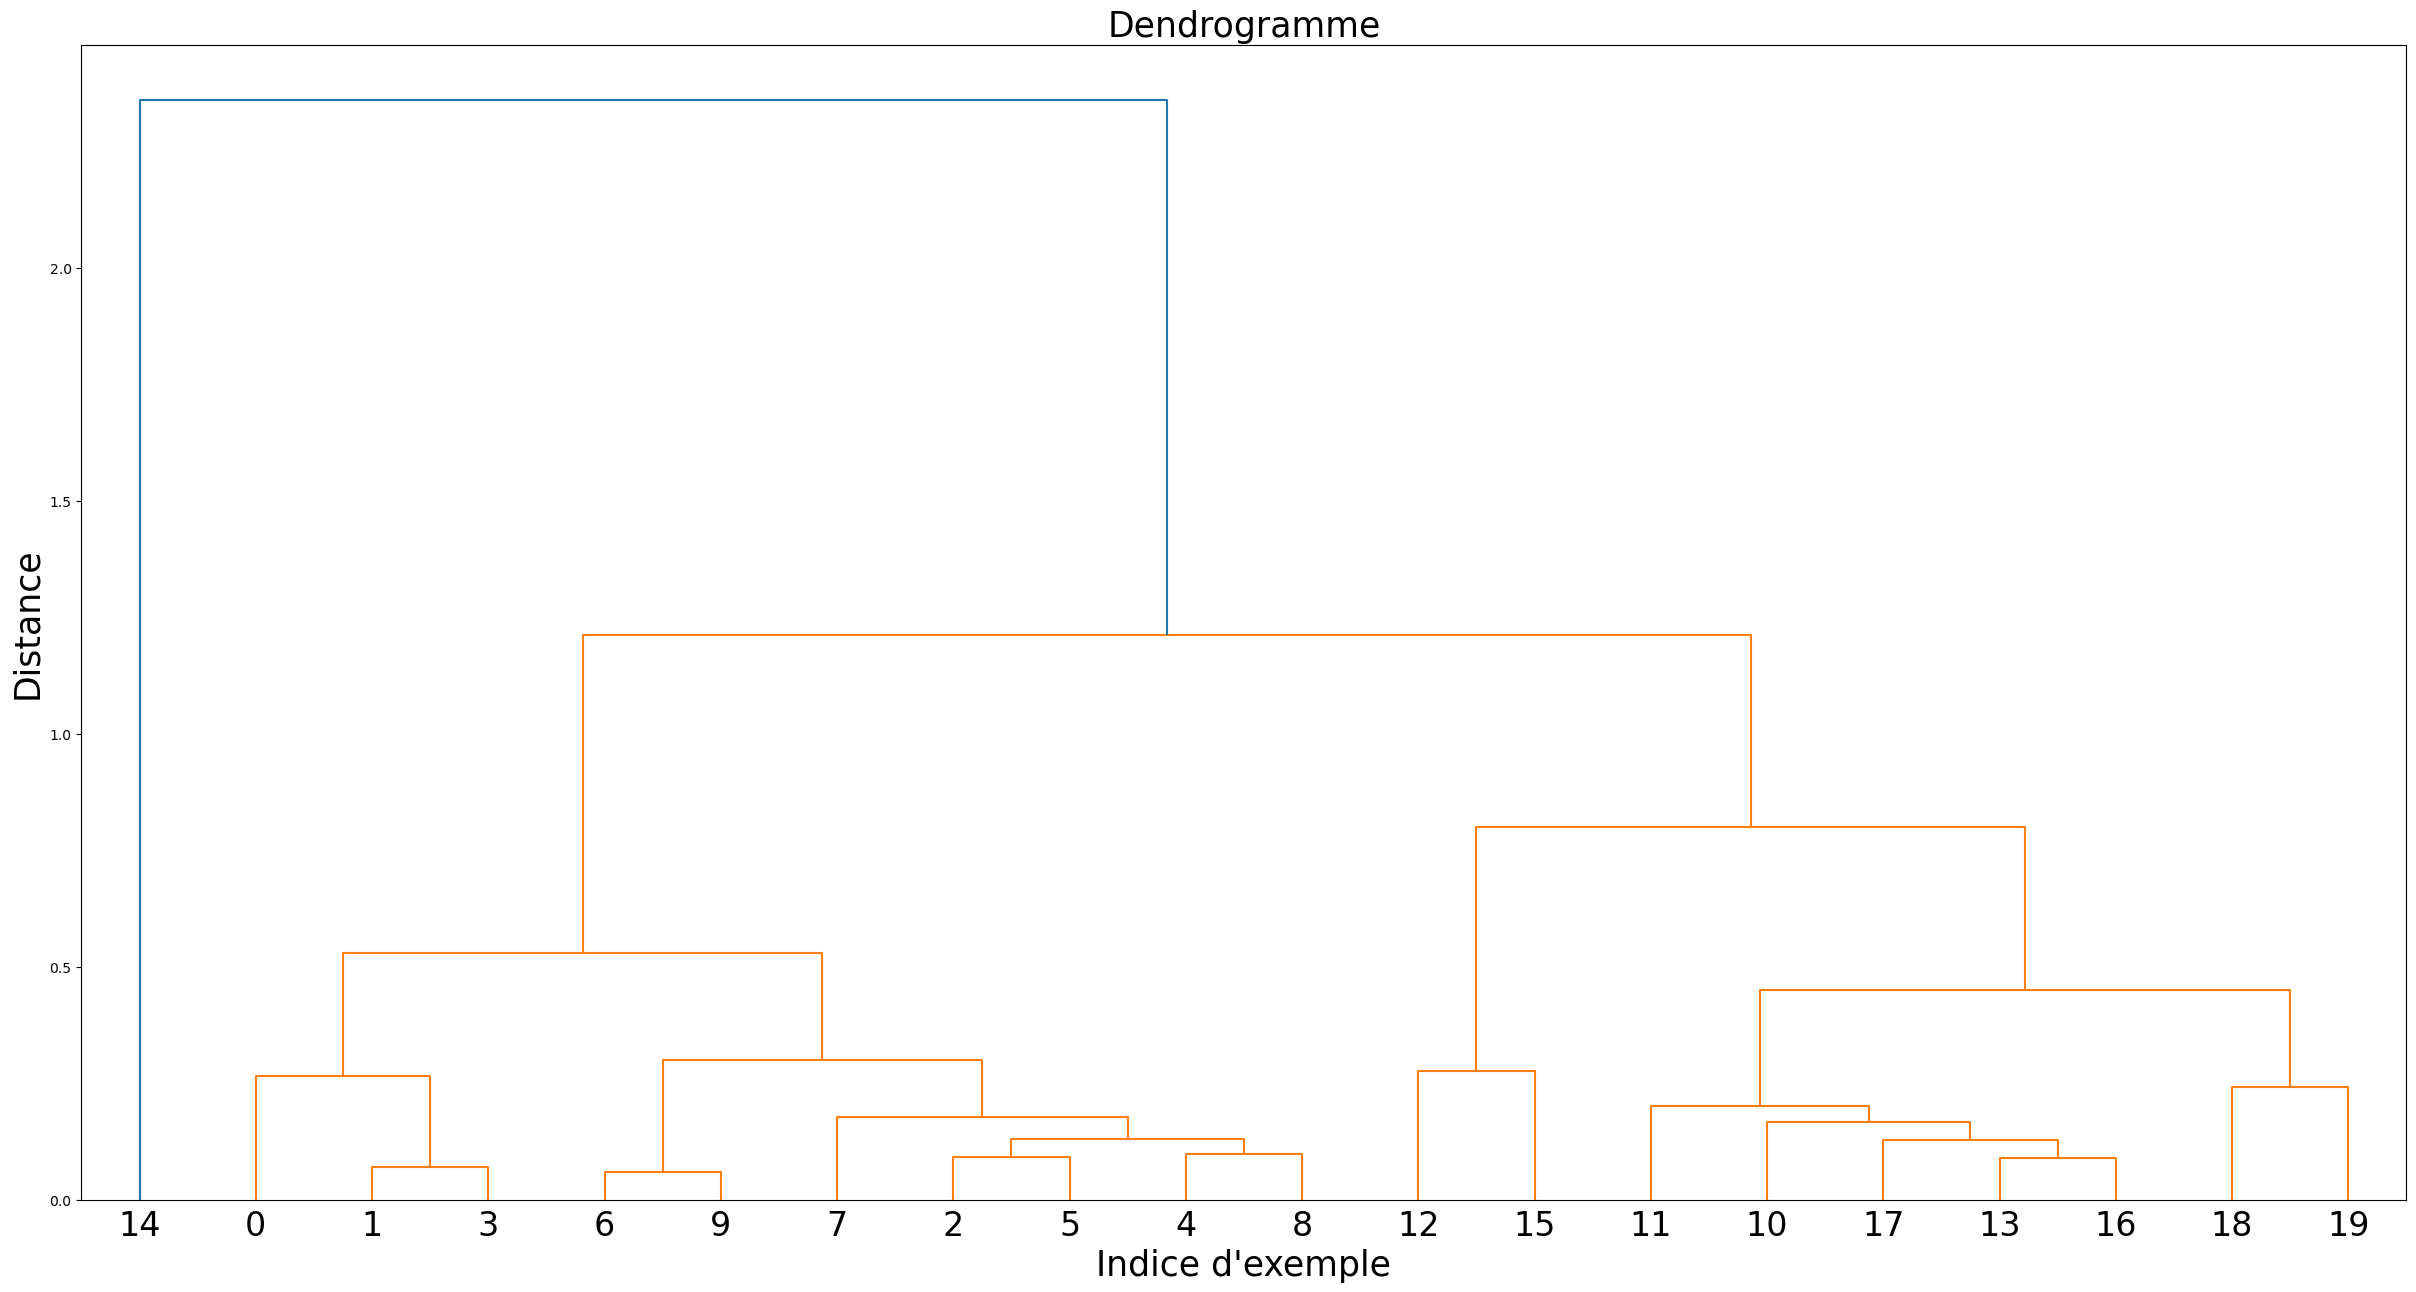

[[6, 9, 0.05980330904516489, 2],
 [1, 3, 0.06995596956812182, 2],
 [13, 16, 0.09034538002040293, 2],
 [2, 5, 0.09099688490823389, 2],
 [4, 8, 0.09818154292330362, 2],
 [17, 22, 0.12738582741517274, 3],
 [23, 24, 0.12946815209263537, 4],
 [10, 25, 0.16780348491242672, 4],
 [7, 26, 0.17652494678428082, 5],
 [11, 27, 0.20205758514354327, 5],
 [18, 19, 0.24168540846465464, 2],
 [0, 21, 0.26630385861454275, 3],
 [12, 15, 0.2757063809341908, 2],
 [20, 28, 0.29903837696397984, 7],
 [29, 30, 0.4494535894504471, 7],
 [31, 33, 0.5293312799971565, 10],
 [32, 34, 0.799029000144456, 9],
 [35, 36, 1.2115868538398997, 19],
 [14, 37, 2.361033153165257, 20]]

In [43]:
CHA(data_Paris_num_norm,linkage='average',verbose=True,dendrogramme=True)